In [1]:
import matplotlib.pyplot as plt # for charts and such

import plotly.express as px

import collections
import csv
import numpy as np
import pandas as pd
from pathlib import Path
import gc


import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

## Import up sound alert dependencies

from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# timeframe = '1m'
# # timeframe = '5m'
# # timeframe = '1h'
# # timeframe = '4h'
# # timeframe = '1d'
# # timeframe = '1w'


# %time df_BTC = pd.read_pickle('~/Desktop/Projects/Datasets/Bitcoin/Engineered/BTC_' + timeframe + '_binary_features_v1.pkl')


# # df_BTC.drop('Unnamed: 0', axis=1, inplace=True)
# # df_BTC.drop('key_0', axis=1, inplace=True)

# df_BTC.reset_index(inplace=True, drop=True)

# df_BTC

In [5]:
# %time df_BTC = pd.read_pickle('~/Desktop/Projects/Crypto_Trading_Bot/Datasets/Engineered_Datasets/BTC_MA_Gaus_Bern_Features_WITH_TIMESTAMPS_v1.pkl')

# timeframe = '1m'
timeframe = '5m'
# timeframe = '1h'
# timeframe = '4h'
# timeframe = '1d'
# timeframe = '1w'


%time df_BTC = pd.read_pickle('~/Desktop/Projects/Crypto_Trading_Bot/Datasets/Engineered_Datasets/BTC_' + timeframe + '_binary_features_v1.pkl')


# df_BTC.drop('Unnamed: 0', axis=1, inplace=True)
# df_BTC.drop('key_0', axis=1, inplace=True)

df_BTC.reset_index(inplace=True, drop=True)

df_BTC

CPU times: total: 109 ms
Wall time: 108 ms


,open_time,open,high,low,close,volume,close_time,quote_asset_vol,num_trades,taker_base_vol,...,EMA_7_slope_change,EMA_14_slope_change,EMA_21_slope_change,EMA_30_slope_change,EMA_55_slope_change,EMA_100_slope_change,EMA_200_slope_change,MACD_slope_change,MACD_SL_slope_change,vol_scaled_Zscore_slope_change
0,1503014400000,4285.080078,4287.089844,4285.080078,4287.089844,2.962987,1503014699999,1.270087e+04,17,1.470580,...,1,1,1,1,1,1,1,1,1,1
1,1503014700000,4267.779785,4292.100098,4267.779785,4292.100098,5.520021,1503014999999,2.359857e+04,23,4.859882,...,1,1,1,1,1,1,1,1,1,1
2,1503015000000,4305.759766,4305.759766,4304.759766,4305.759766,1.975479,1503015299999,8.505768e+03,18,1.433159,...,1,1,1,1,1,1,1,1,1,1
3,1503015300000,4309.080078,4309.080078,4289.529785,4303.830078,7.162071,1503015599999,3.076821e+04,23,6.725505,...,0,0,0,0,0,0,0,0,1,1
4,1503015600000,4303.830078,4303.830078,4285.850098,4303.830078,5.845545,1503015899999,2.509276e+04,14,5.188505,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538469,1665064800000,20110.119141,20112.240234,19993.900391,20039.720703,3440.187500,1665065099999,6.897010e+07,52791,1554.732070,...,0,0,0,0,0,0,0,0,0,0
538470,1665065100000,20039.720703,20040.320312,19900.000000,19973.130859,3952.979248,1665065399999,7.891955e+07,65087,1913.593310,...,0,0,0,0,0,0,0,0,0,0
538471,1665065400000,19973.130859,19974.880859,19900.339844,19942.849609,2723.209229,1665065699999,5.428625e+07,43223,1353.894640,...,0,0,0,0,0,0,0,0,0,0
538472,1665065700000,19944.050781,19992.390625,19931.230469,19950.380859,2259.392090,1665065999999,4.510024e+07,35247,1136.310850,...,1,0,0,0,0,1,0,1,0,0


In [6]:
df_BTC.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_vol,num_trades,taker_base_vol,...,EMA_7_slope_change,EMA_14_slope_change,EMA_21_slope_change,EMA_30_slope_change,EMA_55_slope_change,EMA_100_slope_change,EMA_200_slope_change,MACD_slope_change,MACD_SL_slope_change,vol_scaled_Zscore_slope_change
0,1503014400000,4285.080078,4287.089844,4285.080078,4287.089844,2.962987,1503014699999,12700.868134,17,1.470580,...,1,1,1,1,1,1,1,1,1,1
1,1503014700000,4267.779785,4292.100098,4267.779785,4292.100098,5.520021,1503014999999,23598.571552,23,4.859882,...,1,1,1,1,1,1,1,1,1,1
2,1503015000000,4305.759766,4305.759766,4304.759766,4305.759766,1.975479,1503015299999,8505.768136,18,1.433159,...,1,1,1,1,1,1,1,1,1,1
3,1503015300000,4309.080078,4309.080078,4289.529785,4303.830078,7.162071,1503015599999,30768.209891,23,6.725505,...,0,0,0,0,0,0,0,0,1,1
4,1503015600000,4303.830078,4303.830078,4285.850098,4303.830078,5.845545,1503015899999,25092.763899,14,5.188505,...,0,0,0,0,0,0,0,0,1,1


In [7]:
df_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538474 entries, 0 to 538473
Columns: 162 entries, open_time to vol_scaled_Zscore_slope_change
dtypes: datetime64[ns](1), float32(24), float64(8), int16(17), int32(1), int64(3), int8(108)
memory usage: 173.6 MB


In [8]:
np.where(df_BTC.isnull().sum() > 0)

(array([], dtype=int64),)

In [9]:
[x for x in df_BTC.columns]

['open_time',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'close_time',
 'quote_asset_vol',
 'num_trades',
 'taker_base_vol',
 'taker_quote_vol',
 'timestamp',
 'MA_7',
 'MA_14',
 'MA_21',
 'MA_30',
 'MA_55',
 'MA_100',
 'MA_200',
 'EMA_7',
 'EMA_14',
 'EMA_21',
 'EMA_30',
 'EMA_55',
 'EMA_100',
 'EMA_200',
 'RSI',
 'RSI_signal',
 'RSI_bull_bear',
 'Stoch_RSI_K',
 'Stoch_RSI_D',
 'MACD',
 'MACD_SL',
 'MA_Signal_7_14',
 'MA_Signal_7_21',
 'MA_Signal_7_30',
 'MA_Signal_7_55',
 'MA_Signal_7_100',
 'MA_Signal_7_200',
 'MA_Signal_14_21',
 'MA_Signal_14_30',
 'MA_Signal_14_55',
 'MA_Signal_14_100',
 'MA_Signal_14_200',
 'MA_Signal_21_30',
 'MA_Signal_21_55',
 'MA_Signal_21_100',
 'MA_Signal_21_200',
 'MA_Signal_30_55',
 'MA_Signal_30_100',
 'MA_Signal_30_200',
 'MA_Signal_55_100',
 'MA_Signal_55_200',
 'MA_Signal_100_200',
 'MA_positions_7_14',
 'MA_positions_7_21',
 'MA_positions_7_30',
 'MA_positions_7_55',
 'MA_positions_7_100',
 'MA_positions_7_200',
 'MA_positions_14_21',
 'MA_posit

In [10]:
gc.collect()

468

## Define Windows

In [11]:
windows = 25


test_windows = []

whole = False
year = False
month = False
week = True
day = False



even_spaced = True


# backtest the whole dataset
if(whole):
    windows = 1
    test_windows = [0, len(df_BTC.shape)]
        
        
if (timeframe == '1m'):
    
    year_length = 525960
    month_length = 43830
    week_length = 10080
    day_length = 1440
    
if (timeframe == '5m'):
    
    year_length = (int)(525960/5)
    month_length = (int)(43830/5)
    week_length = (int)(10080/5)
    day_length = (int)(1440/5)
    
if (timeframe == '1h'):
    
    year_length = (int)(525960/60)
    month_length = (int)(43830/60)
    week_length = (int)(10080/60)
    day_length = (int)(1440/60)
    
if (timeframe == '4h'):
    
    year_length = (int)(525960/240)
    month_length = (int)(43830/240)
    week_length = (int)(10080/240)
    day_length = (int)(1440/240)
    
if (timeframe == '1d'):
    
    year_length = (int)(525960/1440)
    month_length = (int)(43830/1440)
    week_length = (int)(10080/1440)
    day_length = (int)(1440/1440)

        
# These windows are evenly spaced, but always start at 0 and finish at the very end of the data.
if(even_spaced):

    
    if(year):
        
        window_length = 'Yearly'
        
        year_start = np.linspace(0, df_BTC.shape[0] - year_length, num=windows, dtype=int)
        year_end = np.linspace(year_length-1, df_BTC.shape[0]-1, num=windows, dtype=int)

        for i in range(windows):
            test_windows = test_windows + [[year_start[i],year_end[i]]]


    if(month):
        
        window_length = 'Monthly'
        
        month_start = np.linspace(0, df_BTC.shape[0] - month_length, num=windows, dtype=int)
        month_end = np.linspace(month_length-1, df_BTC.shape[0]-1, num=windows, dtype=int)

        for i in range(windows):
            test_windows = test_windows + [[month_start[i],month_end[i]]]


    if(week):
        
        window_length = 'Weekly'
        
        week_start = np.linspace(0, df_BTC.shape[0] - week_length, num=windows, dtype=int)
        week_end = np.linspace(week_length-1, df_BTC.shape[0]-1, num=windows, dtype=int)

        for i in range(windows):
            test_windows = test_windows + [[week_start[i],week_end[i]]]


    if(day):
        
        window_length = 'Daily'
        
        day_start = np.linspace(0, df_BTC.shape[0] - day_length, num=windows, dtype=int)
        day_end = np.linspace(day_length-1, df_BTC.shape[0]-1, num=windows, dtype=int)

        for i in range(windows):
            test_windows = test_windows + [[day_start[i],day_end[i]]]

    

# These windows are purely random, but can overlap each other giving additional weight to certain time frames
else:

    for i in range(windows):

        if (year):
            
            window_length = 'Yearly'
            
            random_year_start = (int)(np.random.rand() * df_BTC.shape[0] - year_length)
            while (random_year_start < 0):
                random_year_start = (int)(np.random.rand() * df_BTC.shape[0] - year_length)
            random_year_end = random_year_start + year_length

            test_windows = test_windows + [[random_year_start, random_year_end]]


        if (month):
            
            window_length = 'Monthly'
            
            random_month_start = (int)(np.random.rand() * df_BTC.shape[0] - month_length)
            while (random_month_start < 0):
                random_month_start = (int)(np.random.rand() * df_BTC.shape[0] - month_length)
            random_month_end = random_month_start + month_length

            test_windows = test_windows + [[random_month_start, random_month_end]]

        if (week):
            
            window_length = 'Weekly'
            
            random_week_start = (int)(np.random.rand() * df_BTC.shape[0] - week_length)
            while (random_week_start < 0):
                random_week_start = (int)(np.random.rand() * df_BTC.shape[0] - week_length)
            random_week_end = random_week_start + week_length

            test_windows = test_windows + [[random_week_start, random_week_end]]

        if (day):
            
            window_length = 'Daily'
            
            random_day_start = (int)(np.random.rand() * df_BTC.shape[0] - day_length)
            while (random_day_start < 0):
                random_day_start = (int)(np.random.rand() * df_BTC.shape[0] - day_length)
            random_day_end = random_day_start + day_length

            test_windows = test_windows + [[random_day_start, random_day_end]]


In [12]:
test_windows

[[0, 2015],
 [22352, 24367],
 [44704, 46719],
 [67057, 69072],
 [89409, 91424],
 [111762, 113777],
 [134114, 136129],
 [156466, 158481],
 [178819, 180834],
 [201171, 203186],
 [223524, 225539],
 [245876, 247891],
 [268229, 270244],
 [290581, 292596],
 [312933, 314948],
 [335286, 337301],
 [357638, 359653],
 [379991, 382006],
 [402343, 404358],
 [424695, 426710],
 [447048, 449063],
 [469400, 471415],
 [491753, 493768],
 [514105, 516120],
 [536458, 538473]]

In [13]:
day_length

288

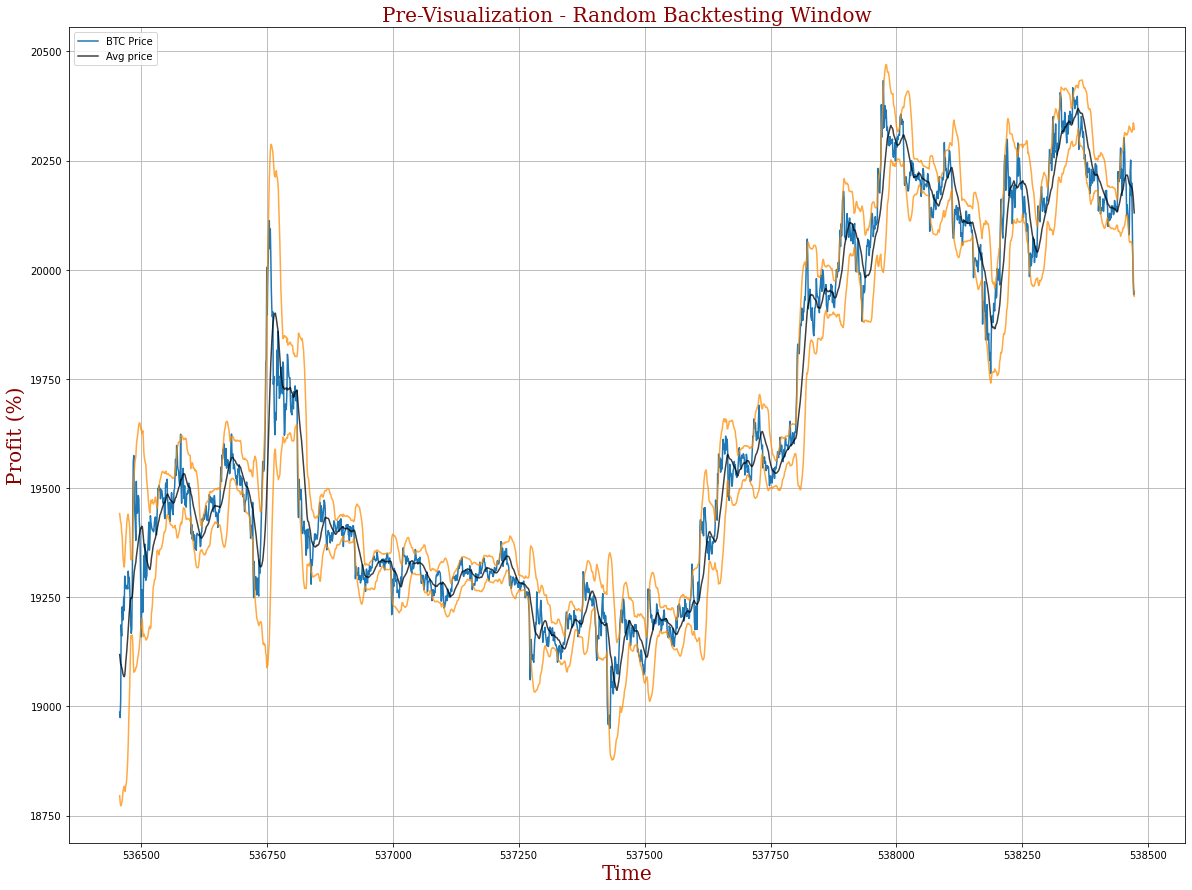

In [14]:
fig = plt.figure(figsize=(20,15))

period = 20
devs = 2
specific_window = -1

test_window = df_BTC[test_windows[specific_window][0]:test_windows[specific_window][1]].copy()
mean_price = df_BTC.close.rolling(window = period).mean().fillna(method='bfill')
std_price = df_BTC.close.rolling(window = period).std().fillna(method='bfill')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

ax = fig.add_subplot(111)



plt.title('Pre-Visualization - Random Backtesting Window', fontdict=font)
plt.xlabel('Time', fontdict=font)
plt.ylabel('Profit (%)', fontdict=font)

plt.plot(test_window.close, label='BTC Price')
plt.plot(mean_price[test_windows[specific_window][0]:test_windows[specific_window][1]], label='Avg price', color='black', alpha=0.75)
plt.plot(mean_price[test_windows[specific_window][0]:test_windows[specific_window][1]] - (std_price[test_windows[specific_window][0]:test_windows[specific_window][1]] * devs), color='darkorange', alpha=0.75)
plt.plot(mean_price[test_windows[specific_window][0]:test_windows[specific_window][1]] + (std_price[test_windows[specific_window][0]:test_windows[specific_window][1]] * devs), color='darkorange', alpha=0.75)




plt.grid()

plt.legend(loc='upper left')




plt.show()

---

## Counting Cards v1


**Strategy:** Similar to counting cards, we have positive/negative point system. Positive points = larger long position, negative points = winding down longs/entering shorts (should be a boolean).


Indicators:
- RSI / Stoch RSI
- MACD
- (E)MA's 
- Bollinger Bands


Conditions:


**When 14 is above 100:**
- Bull run
    - Then start "counting cards":
        - Add together positive indicators (when to buy)
            - (BB) 2 standard deviations below the mean (+1) 
            - (RSI) oversold (under 30) (+1)
            - (HA) green candle after 1 (or 2?) red candles
            - (OPTIONAL) If slope of fast EMA (7, 14) goes beneath -45 degrees, wait for slope reversal towards positive, and buy (+1)
            
        
        - Negative indicators:
            - (BB) 2 STDs above mean (-1)
            - (RSI) overbought (over 70) (-1)
            - (HA) red/green/red pattern? Engulfing? 
            - (OPTIONAL) Derivative of slope of the slow EMA (100) goes negative (rate of change, EMA slowing down)
        
        - Neutral indicators:
            - Lookback window: Sum of top wicks/bottom wicks. Where is the pressure, sell or buy? 
                - If bottom wicks are longer than top wicks, indicates buying pressure - positive (+1)
                    - -(sum of top wicks over N windows / sum of bottom wicks over N windows)
                        - if above number is negative, points = points - 1
                        - if above number is positive, points = points + 1
                - If top wicks are longer than bottom wicks, indicates selling pressure - negative (-1)
            

**When 7 goes under 100:**
- End of bull run

    - Then:
        - Close any open long, get points to 0.


**Notes:**

- Max exposure != max points, we can have lots of positive indicators.
    - Buying/Selling only occurs between max point values (e.g. -5 to +5) and any points beyond this prevent closing too early.



In [15]:
# EMA_0 = 10000
# EMA_1 = 10500

# (EMA_1/EMA_0)-1

# np.arctan(EMA_1 - EMA_0, 2-1) * 180 / np.pi

# import math

# math.atan2((EMA_1/EMA_0), 3 - 1) * 180 / np.pi
# math.atan2(10500-10000, 3 - 1) * 180 / np.pi

# Main Loop

### Long, Short, and Stop 

#### Keeps track of location of all trades


In [16]:
# top_wicks = []
# bot_wicks = []



# for i in df_BTC.index.values:
    
#     # red candle
#     if (df_BTC.loc[i].open > df_BTC.loc[i].close):

#         top_wick_len = df_BTC.loc[i].high - df_BTC.loc[i].open
#         bot_wick_len = abs(df_BTC.loc[i].low - df_BTC.loc[i].close)
        
#         top_wicks.append(top_wick_len)
#         bot_wicks.append(bot_wick_len)

#     # green candle
#     if (df_BTC.loc[i].open < df_BTC.loc[i].close):

#         top_wick_len = df_BTC.loc[i].high - df_BTC.loc[i].close
#         bot_wick_len = abs(df_BTC.loc[i].low - df_BTC.loc[i].open)

#         top_wicks.append(top_wick_len)
#         bot_wicks.append(bot_wick_len)   
    



In [17]:
# top_wicks_len_20 = []
# bot_wicks_len_20 = []

# for i in range(len(top_wicks)):
    
#     if (i <= 20):
#         top_wicks_len_20.append(np.sum(top_wicks[:i]))
#         bot_wicks_len_20.append(np.sum(bot_wicks[:i]))
        
#     else:
#         top_wicks_len_20.append(np.sum(top_wicks[i-20:i]))
#         bot_wicks_len_20.append(np.sum(bot_wicks[i-20:i]))
        
    

In [18]:
# top_wick_len_20 = pd.Series(top_wicks_len_20)
# bot_wick_len_20 = pd.Series(bot_wicks_len_20)

In [19]:
gc.collect()

10

In [20]:
def open_long():
    this_position = max_exposure * balanceUSD
    long_position = max_exposure * balanceUSD + long_position
    long_entry = current_price
    long_size = long_position / current_price
    balanceUSD = balanceUSD - this_position
    df_trade_loc['window_' + str(i)].loc[index] = 1.0 

    LONG_OPEN = True
    
    if (DEBUG):
        print('------------------------------------------------')
        print('(1) LOWER == True and Current Price > Lower Band')
        print('LONG OPENED AT:', index)
        print('NEW LONG SIZE:', this_position)
        print('LONG_POSITION:', long_position)
        print('LONG_ENTRY:', long_entry)
        print('LONG_SIZE:', long_size)
        print('BALANCE USD:', balanceUSD)
        print('------------------------------------------------')
       
    
    
    
        
    
def open_short():
    this_position = max_exposure * balanceUSD
    short_position = max_exposure * balanceUSD + short_position
    short_entry = current_price
    short_size = short_position / current_price
    balanceUSD = balanceUSD - this_position
    df_trade_loc['window_' + str(i)].loc[index] = -1.0 

    SHORT_OPEN = True
    
    if (DEBUG):
        print('------------------------------------------------')
        print('(4) HIGHER == True and Current Price < Upper Band')                    
        print('SHORT OPENED AT:', index)
        print('NEW SHORT SIZE:', this_position)
        print('SHORT_POSITION:', short_position)
        print('SHORT_ENTRY:', short_entry)
        print('SHORT_SIZE:', short_size)
        print('BALANCE USD:', balanceUSD)   
        print('------------------------------------------------')
                        
                        
                        
                        
                        

def close_long():
    long_exit = current_price
    long_profit = (long_exit / long_entry) * long_position * (1-fee_rate) - long_position
    balanceUSD = balanceUSD + long_profit + long_position

    pnl.append(balanceUSD)
    sr_pnl.loc[index] =  balanceUSD
    df_trade_loc['window_' + str(i)].loc[index] = -1.0 

    LONG_OPEN = False
    long_position = 0.0 
    
    
    if (DEBUG):
        print('------------------------------------------------')
        print('(3) HIGHER == True and Current Price < Upper Band')                    
        print('LONG CLOSED AT:', index)
        print('LONG_EXIT:', long_exit)
        print('LONG_PROFIT:', long_profit)
        print('BALANCE USD:', balanceUSD)
        print('------------------------------------------------')

    
    
    
    
def close_short():
    short_exit = current_price
    short_profit = (1 - (short_exit / short_entry) + 1) * short_position * (1 - fee_rate) - short_position
    balanceUSD = balanceUSD + short_profit + short_position

    pnl.append(balanceUSD)
    sr_pnl.loc[index] =  balanceUSD
    df_trade_loc['window_' + str(i)].loc[index] = 1.0 

    SHORT_OPEN = False
    short_position = 0.0
    

    if (DEBUG):
        print('------------------------------------------------')
        print('(2) LOWER == True and Current Price > Lower Band')
        print('SHORT CLOSED AT:', index)
        print('SHORT_EXIT:', short_exit)
        print('SHORT_PROFIT:', short_profit)
        print('BALANCE USD:', balanceUSD)
        print('------------------------------------------------')

In [21]:
DEBUG = True
DEBUG2 = False
CAN_SHORT = False


# Fees = 0.10% (Binance)
fee_rate = 0.001

# Maximum number of points we use to add to positions:
max_points = 5

# Maximum % of portfolio exposure [0.0, 1.0]
max_exposure = 0.1

position_size = max_exposure / max_points


devs = 2
period = 20



df_pnl_total = pd.DataFrame(columns = range(windows))
df_btc_perf = pd.DataFrame(columns = range(windows))


#########################################
### 1d indicators

EMA_7_1d = df_BTC.EMA_7.rolling(window=day_length * 7).mean().fillna(method='bfill')
EMA_14_1d = df_BTC.EMA_14.rolling(window=day_length * 14).mean().fillna(method='bfill')
EMA_100_1d = df_BTC.EMA_100.rolling(window=day_length * 100).mean().fillna(method='bfill')

RSI_1d = df_BTC.RSI.rolling(window=day_length).mean().fillna(method='bfill')




########################################
# HA pattern (green, red, green)
HA_pattern = list([1,0,1])


# Create dataframe of size df_BTC + windows
df_trade_loc = pd.DataFrame(columns = ['window_' + str(x) for x in range(windows)])


for i in df_trade_loc.columns:
    df_trade_loc[i] = df_BTC.close
    df_trade_loc[i] = None



buy_bal = 0
sel_bal = 0

num_buys = 0
num_sells = 0

principal = 1000

position = 0.0


df_pnl = pd.DataFrame(columns = list(range(windows)))
df_fees = pd.DataFrame(columns = list(range(windows)))


print("Starting USD Balance:", principal)

pnl = []

 
print('------------------------------------------------------------------------')
print('-------------------------NEW WINDOW BACKTEST----------------------------')
print('------------------------------------------------------------------------')


# for each window
for i in range(len(test_windows)):    


    # Define the DF based on test windows
    df_BTC2 = df_BTC[test_windows[i][0]:test_windows[i][1]].copy()
    
    start_index = df_BTC2.index[0]
    
    # get live calculations:
    period_mean_price = df_BTC.close.rolling(window = period).mean().fillna(method='bfill')
    period_mean_price = period_mean_price.iloc[test_windows[i][0]:test_windows[i][1]]

    period_std_price = df_BTC.close.rolling(window = period).std().fillna(method='bfill')
    period_std_price = period_std_price.iloc[test_windows[i][0]:test_windows[i][1]]

#     period_mean_price.reset_index(inplace=True, drop=True)
#     period_std_price.reset_index(inplace=True, drop=True)
    
    lower_band = round(period_mean_price - (period_std_price * devs), 2)
    upper_band = round(period_mean_price + (period_std_price * devs), 2)
    

#     df_BTC2.reset_index(inplace=True, drop=True)
    
    

    sr_pnl = pd.Series(index=df_BTC2.index).add(0, principal)
    fees = []
    

    
    print('------------------------------------------------------------------------')
    print('---------------------------- Window: ' + str(i) + ' -------------------------------')
    print('------------------------------------------------------------------------')


    # Starting values
    current_position = 0.0
    points = 0
    balanceUSD = principal
    prev_bal = principal



        
    
    #############
    # Define the starting variables
    #############
    
    # get the starting price
    start_price = df_BTC.loc[test_windows[i][0]].close     
    
    if (start_price < lower_band.head(1).values[0]):
        LOWER = True
    else:
        LOWER = False
        
    if (start_price > upper_band.head(1).values[0]):
        HIGHER = True
    else:
        HIGHER = False        
        
    
    long_position = 0.0
    short_position = 0.0
    
    NET_LONG = False
    NET_SHORT = False
    
    
    
    
    #############
    # Start the backtest loop for this window
    #############
    
    for index in df_BTC2.index:
        
        if ((long_position < 10) and (short_position < 10) and (balanceUSD) < 10):
            print('***Ran out of money, ending loop***')
            break
        
        
        if (points > 0):
            NET_LONG = True
            NET_SHORT = False
        elif (points < 0):
            NET_LONG = False
            NET_SHORT = True
        else:
            NET_LONG = False
            NET_SHORT = False
        
        
        current_price = df_BTC2.loc[index].close 
        
        ###
        # If is it not a bull run
        ###
#         if (EMA_14_1d[index] < EMA_100_1d[index]) and (EMA_7_1d[index] < EMA_100_1d[index]):
#             print('BULL RUN HAS ENDED')
        
        ####
        # If it is a bull run
        ####
#         if (EMA_14_1d[index] > EMA_100_1d[index]) and (EMA_7_1d[index] > EMA_100_1d[index]):
#         while(True):
            
            
            
        #################### BOLLINGER BAND CONDITIONS ####################

        ####
        # If the price goes above the upper band
        ####    
        if (current_price > upper_band[index]):

            HIGHER = True

        ####
        # If the price goes below the lower band
        ####                    

        if (current_price < lower_band[index]):

            LOWER = True

        ####
        # If the price was below and goes above the lower band
        ####
        if (LOWER and current_price > lower_band[index]):

            LOWER = False

            points = points + 1 


            # If we're not already at max position size
            if (np.abs(current_position) < (max_exposure*balanceUSD)) and (np.abs(points) <= max_points):



                # if we reach points = 0, close all positions
                if (points == 0):

                    # Close whatever position is open
                    closed_position = np.abs(current_position)
                    current_position = 0

                    # Take profit on our position
                    balanceUSD = balanceUSD + ((closed_position * current_price) * (1 - fee_rate))
                    fee = np.abs((closed_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = 0.0
                    total_assets = balanceUSD
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)

                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS: 0, closing open position')
                        print('---RSI OVERSOLD---')
                        print('CLOSED POSITION (BTC):', closed_position)
                        print('CLOSED POSITION VALUE (USD):', closed_position * current_price)
                        print('CURRENT_PRICE:', current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')



                # If we're already net long, add to the long position
                elif (points > 0):

                    # Open the new position (2% of balance / price)
                    new_position = ((position_size * balanceUSD) / current_price) 
                    current_position = current_position + new_position

                    # Subtract the long position from our balance as we're opening a long
                    balanceUSD = balanceUSD - ((new_position * current_price) * (1 - fee_rate))
                    fee = np.abs((new_position * current_price) * fee_rate)

                    # Keep track of assets and PNL
                    df_trade_loc['window_' + str(i)].loc[index] = 1.0
                    total_assets = balanceUSD + np.abs(current_position * current_price)
                    pnl.append(total_assets)
                    sr_pnl.loc[index] = total_assets
                    fees.append(fee)


                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS:', points)
                        print('Price went from below to above the lower band')
                        print('BUY ORDER AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('BUY ORDER SIZE (BTC):', new_position)
                        print('CURRENT_POSITION (BTC):', current_position)
                        print('CURRENT POSITION VALUE (USD):', current_position * current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')



                # If we're already net short, close part of the short
                elif (points < 0):

                    # Close part of the short
                    new_position = ((position_size * balanceUSD) / current_price) 
                    current_position = current_position + new_position

                    # Since we're closing a short, take profits
                    balanceUSD = balanceUSD + ((new_position * current_price) * (1 - fee_rate))
                    fee = np.abs((new_position * current_price) * fee_rate)

                    # Keep track of assets and PNL
                    df_trade_loc['window_' + str(i)].loc[index] = 1.0
                    total_assets = balanceUSD + np.abs(current_position * current_price)
                    pnl.append(total_assets)
                    sr_pnl.loc[index] = total_assets
                    fees.append(fee)

                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS:', points)
                        print('Price went from below to above the lower band')
                        print('BUY ORDER AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('BUY ORDER SIZE (BTC):', new_position)
                        print('CURRENT_POSITION (BTC):', current_position)
                        print('CURRENT POSITION VALUE (USD):', current_position * current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')




        ####   
        # If the price was above and now is coming under the upper band
        ####
        if (HIGHER and current_price < upper_band[index]):


            HIGHER = False

            points = points - 1


            # If we're not already at max position size
            if (np.abs(current_position) < (max_exposure*balanceUSD)) and (np.abs(points) <= max_points):


                # if we reach points = 0, close all positions
                if (points == 0):

                    # Close whatever position is open
                    closed_position = np.abs(current_position)
                    current_position = 0

                    # Take profit on our position
                    balanceUSD = balanceUSD + ((closed_position * current_price) * (1 - fee_rate))
                    fee = np.abs((closed_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = 0.0
                    total_assets = balanceUSD
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)

                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS: 0, closing open position')
                        print('---RSI OVERSOLD---')
                        print('CLOSED POSITION (BTC):', closed_position)
                        print('CLOSED POSITION VALUE (USD):', closed_position * current_price)
                        print('CURRENT_PRICE:', current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')




                # If we're net long, we take profits
                elif (points > 0):


                    # New position is -(2% of balance / price)
                    new_position = (-(position_size * balanceUSD) / current_price)
                    current_position = current_position + new_position

                    # Take profits
                    balanceUSD = balanceUSD + np.abs(((new_position * current_price) * (1-fee_rate)))
                    fee = np.abs((new_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = -1.0
                    total_assets = balanceUSD + np.abs(current_position * current_price)
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)

                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS:', points)
                        print('Price went from above to below the upper band')
                        print('SELL ORDER AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('SELL ORDER SIZE (BTC):', new_position)
                        print('CURRENT_POSITION (BTC):', current_position)
                        print('CURRENT POSITION VALUE (USD):', current_position * current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')              


                # If we're net short, we add to the position
                elif (points < 0):

                    # New position is -(2% of balance / price)
                    new_position = (-(position_size * balanceUSD) / current_price)
                    current_position = current_position + new_position

                    # Subtract position from cash holdings
                    balanceUSD = balanceUSD - np.abs(((new_position * current_price) * (1-fee_rate)))
                    fee = np.abs((new_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = -1.0
                    total_assets = balanceUSD + np.abs(current_position * current_price)
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)

                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS:', points)
                        print('Price went from above to below the upper band')
                        print('SELL ORDER AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('SELL ORDER SIZE (BTC):', new_position)
                        print('CURRENT_POSITION (BTC):', current_position)
                        print('CURRENT POSITION VALUE (USD):', current_position * current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')    









        #################### RSI CONDITIONS ######################

        # If the RSI is overbought
        if (df_BTC2.loc[index].RSI > 70):


            points = points - 1


            # If we're not already at max position size
            if (np.abs(current_position) < (max_exposure*balanceUSD)) and (np.abs(points) <= max_points):

                # if we reach points = 0, close all positions
                if (points == 0):

                    # Close whatever position is open
                    closed_position = np.abs(current_position)
                    current_position = 0

                    # Take profit on our position
                    balanceUSD = balanceUSD + ((closed_position * current_price) * (1 - fee_rate))
                    fee = np.abs((closed_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = 0.0
                    total_assets = balanceUSD
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)

                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS: 0, closing open position')
                        print('---RSI OVERSOLD---')
                        print('CLOSED ALL POSITIONS AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('CLOSED POSITION (BTC):', closed_position)
                        print('CLOSED POSITION VALUE (USD):', closed_position * current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')


                # If we're net long, reduce our position size
                elif (points > 0):

                    new_position = (-(position_size * balanceUSD) / current_price)
                    current_position = current_position + new_position

                    # Take profits
                    balanceUSD = balanceUSD + np.abs(((new_position * current_price) * (1-fee_rate)))
                    fee = np.abs((new_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = -1.0
                    total_assets = balanceUSD + np.abs(current_position * current_price)
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)

                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS:', points)
                        print('---RSI OVERBOUGHT---')
                        print('SELL ORDER AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('SELL ORDER SIZE (BTC):', new_position)
                        print('CURRENT_POSITION (BTC):', current_position)
                        print('CURRENT POSITION VALUE (USD):', current_position * current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')


                # If we're already net short, add to the position
                elif (points < 0):

                    new_position = (-(position_size * balanceUSD) / current_price)
                    current_position = current_position + new_position

                    # Subtract the position from our current holdings
                    balanceUSD = balanceUSD - np.abs(((new_position * current_price) * (1-fee_rate)))
                    fee = np.abs((new_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = -1.0
                    total_assets = balanceUSD + np.abs(current_position * current_price)
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)

                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS:', points)
                        print('---RSI OVERBOUGHT---')
                        print('SELL ORDER AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('SELL ORDER SIZE (BTC):', new_position)
                        print('CURRENT_POSITION (BTC):', current_position)
                        print('CURRENT POSITION VALUE (USD):', current_position * current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')




        # If the RSI is oversold
        if (df_BTC2.loc[index].RSI < 30):


            points = points + 1 


            # If we're not already at max position size
            if (np.abs(current_position) < (max_exposure*balanceUSD)) and (np.abs(points) <= max_points):

                # if we reach points = 0, close all positions
                if (points == 0):

                    # Close whatever position is open
                    closed_position = np.abs(current_position)
                    current_position = 0

                    # Take profit on our position
                    balanceUSD = balanceUSD + ((closed_position * current_price) * (1 - fee_rate))
                    fee = np.abs((closed_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = 0.0
                    total_assets = balanceUSD
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)

                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS: 0, closing open position')
                        print('---RSI OVERSOLD---')
                        print('CLOSED ALL POSITIONS AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('CLOSED POSITION (BTC):', closed_position)
                        print('CLOSED POSITION VALUE (USD):', closed_position * current_price)
                        print('CURRENT_PRICE:', current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')



                # If we're already net long, add to the position
                elif (points > 0):
                    new_position = ((position_size * balanceUSD) / current_price)
                    current_position = current_position + new_position

                    # Remove the new position from our holdings
                    balanceUSD = balanceUSD - ((new_position * current_price) * (1-fee_rate))
                    fee = np.abs((new_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = 1.0
                    total_assets = balanceUSD + np.abs(current_position * current_price)
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)


                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS:', points)
                        print('---RSI OVERSOLD---')
                        print('BUY ORDER AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('BUY ORDER SIZE (BTC):', new_position)
                        print('CURRENT_POSITION (BTC):', current_position)
                        print('CURRENT POSITION VALUE (USD):', current_position * current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')  




                # If we're net short, take profits 
                elif (points < 0):
                    new_position = ((position_size * balanceUSD) / current_price)
                    current_position = current_position + new_position

                    # Remove the new position from our holdings
                    balanceUSD = balanceUSD + ((new_position * current_price) * (1-fee_rate))
                    fee = np.abs((new_position * current_price) * fee_rate)

                    df_trade_loc['window_' + str(i)].loc[index] = 1.0
                    total_assets = balanceUSD + np.abs(current_position * current_price)
                    pnl.append(total_assets)
                    sr_pnl.loc[index] =  total_assets
                    fees.append(fee)


                    if (DEBUG):
                        print('------------------------------------------------')
                        print('CURRENT POINTS:', points)
                        print('---RSI OVERSOLD---')
                        print('BUY ORDER AT:', index)
                        print('CURRENT_PRICE:', current_price)
                        print('BUY ORDER SIZE (BTC):', new_position)
                        print('CURRENT_POSITION (BTC):', current_position)
                        print('CURRENT POSITION VALUE (USD):', current_position * current_price)
                        print('BALANCE USD:', balanceUSD)
                        print('TOTAL ASSETS:', total_assets)
                        print('TOTAL FEES SO FAR:', np.sum(fees))
                        print('------------------------------------------------')
                


                
                
                
                
            #################### HA CONDITIONS ######################
            
#             # if there is a Green -> Red -> Green HA candle sandwich
#             if (index - 2 > start_index):
#                 if (list(df_BTC2.loc[index - 2 : index]) == HA_pattern):
                
#                     points = points + 1
            
#                 # If we're not already at max position size
#                 if (np.abs(current_position) < (max_exposure*balanceUSD)):
                    
#                     new_position = ((position_size * balanceUSD) / current_price) * (1-fee_rate)
#                     current_position = current_position + new_position
#                     balanceUSD = balanceUSD - (new_position * current_price)
                    
#                     df_trade_loc['window_' + str(i)].loc[index] = 1.0
#                     total_assets = balanceUSD + np.abs(current_position * current_price)
#                     pnl.append(total_assets)
#                     sr_pnl.loc[index] =  total_assets



#                     if (DEBUG):
#                         print('------------------------------------------------')
#                         print('CURRENT POINTS:', points)
#                         print('(1) LOWER == True and Current Price > Lower Band')
#                         print('LONG OPENED AT:', index)
#                         print('NEW LONG SIZE (BTC):', new_position)
#                         print('CURRENT_POSITION (BTC):', current_position)
#                         print('LONG_ENTRY:', current_price)
#                         print('BALANCE USD:', balanceUSD)
#                         print('TOTAL ASSETS:', total_assets)
#                         print('------------------------------------------------') 
            
            
#             #################### WICK LENGTH CONDITIONS #############
            
#             # If more selling pressure
#             if (top_wick_len_20[index] > bot_wick_len_20[index]):
                
#                 points = points - 1

#                 # If we're not already at max position size
#                 if (np.abs(current_position) < (max_exposure*balanceUSD)):
                    
#                     new_position = (-(position_size * balanceUSD) / current_price) * (1-fee_rate)
#                     current_position = current_position + new_position
#                     balanceUSD = balanceUSD - np.abs(new_position * current_price)
                    
#                     df_trade_loc['window_' + str(i)].loc[index] = -1.0
#                     total_assets = balanceUSD + np.abs(current_position * current_price)
#                     pnl.append(total_assets)
#                     sr_pnl.loc[index] =  total_assets

                    
#                     if (DEBUG):
#                         print('------------------------------------------------')
#                         print('CURRENT POINTS:', points)
#                         print('(2) HIGHER == True and Current Price < Upper Band')
#                         print('SHORT OPENED AT:', index)
#                         print('NEW SHORT SIZE (BTC):', new_position)
#                         print('CURRENT_POSITION (BTC):', current_position)
#                         print('SHORT_ENTRY:', current_price)
#                         print('BALANCE USD:', balanceUSD)
#                         print('TOTAL ASSETS:', total_assets)
#                         print('------------------------------------------------')                
                
                
                
                
#             # If more buying pressure
#             if (top_wick_len_20[index] < bot_wick_len_20[index]):
                
#                 points = points + 1
                
                
#                 # If we're not already at max position size
#                 if (np.abs(current_position) < (max_exposure*balanceUSD)):
                    
#                     new_position = ((position_size * balanceUSD) / current_price) * (1-fee_rate)
#                     current_position = current_position + new_position
#                     balanceUSD = balanceUSD - (new_position * current_price)
                    
#                     df_trade_loc['window_' + str(i)].loc[index] = 1.0
#                     total_assets = balanceUSD + np.abs(current_position * current_price)
#                     pnl.append(total_assets)
#                     sr_pnl.loc[index] = total_assets



#                     if (DEBUG):
#                         print('------------------------------------------------')
#                         print('CURRENT POINTS:', points)
#                         print('(1) LOWER == True and Current Price > Lower Band')
#                         print('LONG OPENED AT:', index)
#                         print('NEW LONG SIZE (BTC):', new_position)
#                         print('CURRENT_POSITION (BTC):', current_position)
#                         print('LONG_ENTRY:', current_price)
#                         print('BALANCE USD:', balanceUSD)
#                         print('TOTAL ASSETS:', total_assets)
#                         print('------------------------------------------------') 
            
        
                
            
    ########## STRATEGY LOOP OVER ###########
    # If a position is still outstanding
    if (current_position != 0.0):
        
        
        if (points != 0.0):

            # Close the position
            current_price = df_BTC2.loc[index].close
            closed_position = np.abs(current_position * current_price * (1-fee_rate))
            balanceUSD = balanceUSD + closed_position
            pnl.append(total_assets)
            sr_pnl.loc[index] = total_assets
            df_trade_loc['window_' + str(i)].loc[index] = 0.0 
            LONG_OPEN = False
            SHORT_OPEN = False
            current_position = 0.0



            if (DEBUG):
                print('------------------------------------------------')
                print('LOOP OVER, CLOSING POSITION')                    
                print('POSITION CLOSED AT:', index)
                print('CURRENT_PRICE:', current_price)
                print('BALANCE USD:', balanceUSD)
                print('------------------------------------------------')

    
#         if (SHORT_OPEN):

#             # CLOSE THE SHORT
#             current_price = df_BTC2.loc[index].close
#             closed_position = current_position * current_price * (1-fee_rate) 
#             balanceUSD = balanceUSD + short_profit + short_position
#             pnl.append(balanceUSD)
#             sr_pnl.loc[index] = balanceUSD
#             df_trade_loc['window_' + str(i)].loc[index] = [0.0, current_price]
#             SHORT_OPEN = False
#             short_position = 0.0



#             if (DEBUG):
#                 print('------------------------------------------------')
#                 print('LOOP OVER, CLOSING POSITION')                    
#                 print('SHORT CLOSED AT:', index)
#                 print('SHORT_EXIT:', short_exit)
#                 print('SHORT_PROFIT:', short_profit)
#                 print('BALANCE USD:', balanceUSD)
#                 print('------------------------------------------------')


                
                
            
    # add the list of trades to df_pnl
    df_pnl[i] = sr_pnl.reset_index(inplace=False, drop=True)
        
    for i in df_pnl.columns:
        df_pnl[i].loc[0] = principal
        df_pnl[i] = df_pnl[i].interpolate()
        
        
    # add the fees to df_fees
    df_fees[i] = pd.Series(fees)
    
    


    ############################
    ##### WINDOW LOOP OVER #####
    ##### NEXT WINDOW PLS ######
    ############################        
        
        
        
################################################################
# Calculate the avg performance of BTC for the same time period
################################################################

cols2 = []
for i in range(windows):
    cols2.append(i)

btc_perf = pd.DataFrame(columns=cols2)

###############################
# Test BTC's performance for all these windows
###############################

i = 0

for window in test_windows:
    
    
    btc_window_prices = pd.Series(df_BTC.close[window[0]:window[1]].reset_index(inplace=False, drop=True))
    btc_window_return = btc_window_prices / btc_window_prices[0]
    btc_perf[i] = btc_window_return

    i = i+1



df_pnl_total = df_pnl[list(df_pnl.columns)].sum(axis=1, numeric_only=True).copy() / windows

df_btc_perf = btc_perf[list(btc_perf.columns)].sum(axis=1, numeric_only=True).copy() * principal / windows
                
                

allDone()

Starting USD Balance: 1000
------------------------------------------------------------------------
-------------------------NEW WINDOW BACKTEST----------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
---------------------------- Window: 0 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: -1
---RSI OVERBOUGHT---
SELL ORDER AT: 0
CURRENT_PRICE: 4287.09
SELL ORDER SIZE (BTC): -0.00466516931740008
CURRENT_POSITION (BTC): -0.00466516931740008
CURRENT POSITION VALUE (USD): -20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -2
---RSI OVERBOUGHT---
SELL ORDER AT: 1
CURRENT_PRICE: 4292.1
SELL ORDER SIZE (BTC): -0.00456662229538

------------------------------------------------
CURRENT POINTS: 5
---RSI OVERBOUGHT---
SELL ORDER AT: 272
CURRENT_PRICE: 4088.41
SELL ORDER SIZE (BTC): -0.004575164541123708
CURRENT_POSITION (BTC): 0.01953169766945513
CURRENT POSITION VALUE (USD): 79.85358635212394
BALANCE USD: 953.9438458844774
TOTAL ASSETS: 1033.7974322366013
TOTAL FEES SO FAR: 0.5404831371016534
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
---RSI OVERBOUGHT---
SELL ORDER AT: 273
CURRENT_PRICE: 4101.35
SELL ORDER SIZE (BTC): -0.004651852795642179
CURRENT_POSITION (BTC): 0.014879844873812952
CURRENT POSITION VALUE (USD): 61.0274532263226
BALANCE USD: 973.0036439252492
TOTAL ASSETS: 1034.0310971515719
TOTAL FEES SO FAR: 0.5595620140193429
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 3
---RSI OVERBOUGHT---
SELL ORDER AT: 274
CURRENT_PRICE: 4101.35
SELL ORDER SIZE (BTC): -0.00474479

------------------------------------------------
CURRENT POINTS: 5
---RSI OVERBOUGHT---
SELL ORDER AT: 547
CURRENT_PRICE: 4149.99
SELL ORDER SIZE (BTC): -0.004773458538403769
CURRENT_POSITION (BTC): 0.005702772743557863
CURRENT POSITION VALUE (USD): 23.666451194625058
BALANCE USD: 1010.2803124407312
TOTAL ASSETS: 1033.9467636353563
TOTAL FEES SO FAR: 1.0345357088555256
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
Price went from above to below the upper band
SELL ORDER AT: 548
CURRENT_PRICE: 4149.99
SELL ORDER SIZE (BTC): -0.004868832240001077
CURRENT_POSITION (BTC): 0.0008339405035567857
CURRENT POSITION VALUE (USD): 3.4608449458104307
BALANCE USD: 1030.465713083297
TOTAL ASSETS: 1033.9265580291074
TOTAL FEES SO FAR: 1.0547413151043403
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 3
---RSI OVERBOUGHT---
SELL ORDER AT: 548
CURRENT_PRICE: 4149.99
SEL

------------------------------------------------
CURRENT POINTS: -5
---RSI OVERSOLD---
BUY ORDER AT: 23000
CURRENT_PRICE: 7200.01
BUY ORDER SIZE (BTC): 0.002517557349604386
CURRENT_POSITION (BTC): -0.010679652992174698
CURRENT POSITION VALUE (USD): -76.89360583714408
BALANCE USD: 924.4301861987984
TOTAL ASSETS: 1001.3237920359425
TOTAL FEES SO FAR: 0.3091775131420193
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
---RSI OVERSOLD---
BUY ORDER AT: 23001
CURRENT_PRICE: 7195.52
BUY ORDER SIZE (BTC): 0.002569460396717846
CURRENT_POSITION (BTC): -0.008110192595456853
CURRENT POSITION VALUE (USD): -58.35705318286389
BALANCE USD: 942.9003013190504
TOTAL ASSETS: 1001.2573545019143
TOTAL FEES SO FAR: 0.3276661168659953
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
---RSI OVERSOLD---
BUY ORDER AT: 23002
CURRENT_PRICE: 7200.24
BUY ORDER SIZE (BTC): 0.00261908

------------------------------------------------
CURRENT POINTS: 5
---RSI OVERBOUGHT---
SELL ORDER AT: 23306
CURRENT_PRICE: 7175.03
SELL ORDER SIZE (BTC): -0.0025256036288210403
CURRENT_POSITION (BTC): 0.010944270988117682
CURRENT POSITION VALUE (USD): 78.52547031656579
BALANCE USD: 924.1672230955111
TOTAL ASSETS: 1002.6926934120769
TOTAL FEES SO FAR: 0.9662389230016175
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
Price went from above to below the upper band
SELL ORDER AT: 23307
CURRENT_PRICE: 7169.06
SELL ORDER SIZE (BTC): -0.00257821029686503
CURRENT_POSITION (BTC): 0.008366060691252652
CURRENT POSITION VALUE (USD): 59.97679154943061
BALANCE USD: 942.6320842129594
TOTAL ASSETS: 1002.60887576239
TOTAL FEES SO FAR: 0.9847222674635278
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 3
---RSI OVERBOUGHT---
SELL ORDER AT: 23307
CURRENT_PRICE: 7169.06
SEL

------------------------------------------------
CURRENT POINTS: 4
---RSI OVERBOUGHT---
SELL ORDER AT: 23547
CURRENT_PRICE: 7122.0
SELL ORDER SIZE (BTC): -0.0026433061358176182
CURRENT_POSITION (BTC): 0.006100306883833793
CURRENT POSITION VALUE (USD): 43.446385626664274
BALANCE USD: 960.0881156376475
TOTAL ASSETS: 1003.5345012643119
TOTAL FEES SO FAR: 1.388719262057012
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 3
---RSI OVERBOUGHT---
SELL ORDER AT: 23548
CURRENT_PRICE: 7150.02
SELL ORDER SIZE (BTC): -0.0026855536432486525
CURRENT_POSITION (BTC): 0.0034147532405851408
CURRENT POSITION VALUE (USD): 24.415554031942968
BALANCE USD: 979.2706761880877
TOTAL ASSETS: 1003.6862302200307
TOTAL FEES SO FAR: 1.4079210243697649
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 2
---RSI OVERBOUGHT---
SELL ORDER AT: 23549
CURRENT_PRICE: 7220.0
SELL ORDER SIZE (BTC): -

------------------------------------------------------------------------
---------------------------- Window: 2 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: -1
---RSI OVERBOUGHT---
SELL ORDER AT: 44711
CURRENT_PRICE: 12686.99
SELL ORDER SIZE (BTC): -0.0015764180180268942
CURRENT_POSITION (BTC): -0.0015764180180268942
CURRENT POSITION VALUE (USD): -20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -2
---RSI OVERBOUGHT---
SELL ORDER AT: 44712
CURRENT_PRICE: 12718.02
SELL ORDER SIZE (BTC): -0.0015411519027659145
CURRENT_POSITION (BTC): -0.003117569920792809
CURRENT POSITION VALUE (USD): -39.64931514268046
BALANCE USD: 960.4392004
TOTAL ASSETS: 1000.0885155426805
TOTAL FEES SO FAR: 0.0396004
-------------------------------------------

------------------------------------------------
CURRENT POINTS: 4
---RSI OVERBOUGHT---
SELL ORDER AT: 67295
CURRENT_PRICE: 6758.39
SELL ORDER SIZE (BTC): -0.002731978344417161
CURRENT_POSITION (BTC): 0.008931168357889726
CURRENT POSITION VALUE (USD): 60.36032013933652
BALANCE USD: 941.6340865530494
TOTAL ASSETS: 1001.994406692386
TOTAL FEES SO FAR: 0.5621074230783939
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 3
Price went from above to below the upper band
SELL ORDER AT: 67297
CURRENT_PRICE: 6755.21
SELL ORDER SIZE (BTC): -0.0027878751126852253
CURRENT_POSITION (BTC): 0.006143293245204501
CURRENT POSITION VALUE (USD): 41.4992357229655
BALANCE USD: 960.4479356023794
TOTAL ASSETS: 1001.9471713253449
TOTAL FEES SO FAR: 0.5809401048094549
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 2
---RSI OVERBOUGHT---
SELL ORDER AT: 67299
CURRENT_PRICE: 6766.0
SEL

------------------------------------------------------------------------
---------------------------- Window: 4 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: 1
Price went from below to above the lower band
BUY ORDER AT: 89430
CURRENT_PRICE: 6161.41
BUY ORDER SIZE (BTC): 0.003246010165337303
CURRENT_POSITION (BTC): 0.003246010165337303
CURRENT POSITION VALUE (USD): 20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 0, closing open position
---RSI OVERSOLD---
CLOSED ALL POSITIONS AT: 89459
CURRENT_PRICE: 6248.0
CLOSED POSITION (BTC): 0.003246010165337303
CLOSED POSITION VALUE (USD): 20.28107151302747
BALANCE USD: 1000.2807904415145
TOTAL ASSETS: 1000.2807904415145
TOTAL FEES SO FAR: 0.04028107151302747
--------------------------------

------------------------------------------------
CURRENT POINTS: 1
---RSI OVERBOUGHT---
SELL ORDER AT: 89652
CURRENT_PRICE: 6130.62
SELL ORDER SIZE (BTC): -0.0031317491217902186
CURRENT_POSITION (BTC): 0.0034234096332958082
CURRENT POSITION VALUE (USD): 20.987623967256763
BALANCE USD: 979.1585730054335
TOTAL ASSETS: 1000.1461969726903
TOTAL FEES SO FAR: 0.5226400259819395
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 0, closing open position
---RSI OVERSOLD---
CLOSED POSITION (BTC): 0.0034234096332958082
CLOSED POSITION VALUE (USD): 20.931308210154356
CURRENT_PRICE: 6114.17
BALANCE USD: 1000.0689499073777
TOTAL ASSETS: 1000.0689499073777
TOTAL FEES SO FAR: 0.5435713341920938
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -1
---RSI OVERBOUGHT---
SELL ORDER AT: 89666
CURRENT_PRICE: 6134.8
SELL ORDER SIZE (BTC): -0.0032603148651835106
CURRENT_POSITION (BTC

TOTAL ASSETS: 999.0796206218922
TOTAL FEES SO FAR: 1.0815921198992458
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -5
---RSI OVERSOLD---
BUY ORDER AT: 89989
CURRENT_PRICE: 6072.89
BUY ORDER SIZE (BTC): 0.0030297200197878437
CURRENT_POSITION (BTC): -0.009909796023371227
CURRENT POSITION VALUE (USD): -60.18110252722582
BALANCE USD: 938.3385989278104
TOTAL ASSETS: 998.5197014550362
TOTAL FEES SO FAR: 1.0999912767244346
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
Price went from below to above the lower band
BUY ORDER AT: 89990
CURRENT_PRICE: 6098.38
BUY ORDER SIZE (BTC): 0.0030773373156775525
CURRENT_POSITION (BTC): -0.006832458707693674
CURRENT POSITION VALUE (USD): -41.66692873314619
BALANCE USD: 957.086604134388
TOTAL ASSETS: 998.7535328675342
TOTAL FEES SO FAR: 1.118758048702991
------------------------------------------------
------------------

------------------------------------------------
CURRENT POINTS: -2
Price went from below to above the lower band
BUY ORDER AT: 90547
CURRENT_PRICE: 6334.42
BUY ORDER SIZE (BTC): 0.0032035317481425205
CURRENT_POSITION (BTC): -0.00047941760448542026
CURRENT POSITION VALUE (USD): -3.0368324247500356
BALANCE USD: 1034.8979891001186
TOTAL ASSETS: 1037.9348215248685
TOTAL FEES SO FAR: 1.5944023782946612
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -1
---RSI OVERSOLD---
BUY ORDER AT: 90551
CURRENT_PRICE: 6315.92
BUY ORDER SIZE (BTC): 0.0032771092790957667
CURRENT_POSITION (BTC): 0.0027976916746103465
CURRENT POSITION VALUE (USD): 17.66999658293532
BALANCE USD: 1055.575250922339
TOTAL ASSETS: 1073.2452475052742
TOTAL FEES SO FAR: 1.6151003380766635
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 0, closing open position
---RSI OVERSOLD---
CLOSED POSITION (BTC)

------------------------------------------------
CURRENT POINTS: 3
Price went from above to below the upper band
SELL ORDER AT: 90811
CURRENT_PRICE: 6320.0
SELL ORDER SIZE (BTC): -0.0031308207401532827
CURRENT_POSITION (BTC): 0.010114508880772262
CURRENT POSITION VALUE (USD): 63.92369612648069
BALANCE USD: 1009.1063541791283
TOTAL ASSETS: 1073.030050305609
TOTAL FEES SO FAR: 2.0264200800431924
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 2
---RSI OVERBOUGHT---
SELL ORDER AT: 90826
CURRENT_PRICE: 6334.3
SELL ORDER SIZE (BTC): -0.00318616543357285
CURRENT_POSITION (BTC): 0.006928343447199412
CURRENT POSITION VALUE (USD): 43.88620454440316
BALANCE USD: 1029.2682991356273
TOTAL ASSETS: 1073.1545036800305
TOTAL FEES SO FAR: 2.046602207126775
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 1
Price went from above to below the upper band
SELL ORDER AT: 90827
C

------------------------------------------------
CURRENT POINTS: 5
---RSI OVERBOUGHT---
SELL ORDER AT: 91064
CURRENT_PRICE: 6414.51
SELL ORDER SIZE (BTC): -0.003026792191027835
CURRENT_POSITION (BTC): 0.013246630353527704
CURRENT POSITION VALUE (USD): 84.970639764328
BALANCE USD: 990.1653760730745
TOTAL ASSETS: 1075.1360158374025
TOTAL FEES SO FAR: 2.5900633816826746
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
---RSI OVERBOUGHT---
SELL ORDER AT: 91065
CURRENT_PRICE: 6595.6
SELL ORDER SIZE (BTC): -0.0030025027636982732
CURRENT_POSITION (BTC): 0.01024412758982943
CURRENT POSITION VALUE (USD): 67.56616893188207
BALANCE USD: 1009.9488802870145
TOTAL ASSETS: 1077.5150492188966
TOTAL FEES SO FAR: 2.609866689204136
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 3
---RSI OVERBOUGHT---
SELL ORDER AT: 91066
CURRENT_PRICE: 6586.66
SELL ORDER SIZE (BTC): -0.003

------------------------------------------------
LOOP OVER, CLOSING POSITION
POSITION CLOSED AT: 136128
CURRENT_PRICE: 3645.84
BALANCE USD: 1018.7081351316713
------------------------------------------------
------------------------------------------------------------------------
---------------------------- Window: 7 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: 1
---RSI OVERSOLD---
BUY ORDER AT: 156470
CURRENT_PRICE: 3603.67
BUY ORDER SIZE (BTC): 0.005549897863451917
CURRENT_POSITION (BTC): 0.005549897863451917
CURRENT POSITION VALUE (USD): 20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 2
---RSI OVERSOLD---
BUY ORDER AT: 156471
CURRENT_PRICE: 3601.59
BUY ORDER SIZE (BTC): 0.005442151805643029
CURRENT_POSITION (BTC): 0.01099204

------------------------------------------------
LOOP OVER, CLOSING POSITION
POSITION CLOSED AT: 158480
CURRENT_PRICE: 3953.11
BALANCE USD: 1008.508439871853
------------------------------------------------
------------------------------------------------------------------------
---------------------------- Window: 8 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: -1
---RSI OVERBOUGHT---
SELL ORDER AT: 178829
CURRENT_PRICE: 5813.51
SELL ORDER SIZE (BTC): -0.0034402625619138075
CURRENT_POSITION (BTC): -0.0034402625619138075
CURRENT POSITION VALUE (USD): -20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -2
---RSI OVERBOUGHT---
SELL ORDER AT: 178834
CURRENT_PRICE: 5823.02
SELL ORDER SIZE (BTC): -0.003366019682957886
CURRENT_POSITION (B

------------------------------------------------
CURRENT POINTS: -5
---RSI OVERSOLD---
BUY ORDER AT: 179246
CURRENT_PRICE: 5739.98
BUY ORDER SIZE (BTC): 0.0031482157708622354
CURRENT_POSITION (BTC): -0.01350742061472092
CURRENT POSITION VALUE (USD): -77.53232391626898
BALANCE USD: 921.5873997507074
TOTAL ASSETS: 999.1197236669764
TOTAL FEES SO FAR: 0.5024709765613462
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
---RSI OVERSOLD---
BUY ORDER AT: 179247
CURRENT_PRICE: 5717.98
BUY ORDER SIZE (BTC): 0.0032234719355388767
CURRENT_POSITION (BTC): -0.010283948679182042
CURRENT POSITION VALUE (USD): -58.80341266773096
BALANCE USD: 940.0007159977265
TOTAL ASSETS: 998.8041286654575
TOTAL FEES SO FAR: 0.5209027245563603
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
---RSI OVERSOLD---
BUY ORDER AT: 179248
CURRENT_PRICE: 5726.57
BUY ORDER SIZE (BTC): 0.003282

------------------------------------------------
CURRENT POINTS: 5
Price went from above to below the upper band
SELL ORDER AT: 179457
CURRENT_PRICE: 5701.31
SELL ORDER SIZE (BTC): -0.0032832508982340086
CURRENT_POSITION (BTC): 0.014202114465964845
CURRENT POSITION VALUE (USD): 80.97065805810517
BALANCE USD: 954.6416810890433
TOTAL ASSETS: 1035.6123391471485
TOTAL FEES SO FAR: 1.0482719889819232
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 5
---RSI OVERBOUGHT---
SELL ORDER AT: 179489
CURRENT_PRICE: 5723.33
SELL ORDER SIZE (BTC): -0.0033359658382722183
CURRENT_POSITION (BTC): 0.010866148627692626
CURRENT POSITION VALUE (USD): 62.1905552742499
BALANCE USD: 973.7154218772024
TOTAL ASSETS: 1035.9059771514524
TOTAL FEES SO FAR: 1.0673648226037038
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
---RSI OVERBOUGHT---
SELL ORDER AT: 179490
CURRENT_PRICE: 5722.

------------------------------------------------
CURRENT POINTS: 2
Price went from above to below the upper band
SELL ORDER AT: 201395
CURRENT_PRICE: 10608.6
SELL ORDER SIZE (BTC): -0.001844042584723531
CURRENT_POSITION (BTC): 0.00028674122234379753
CURRENT POSITION VALUE (USD): 3.0419228193481205
BALANCE USD: 997.6786189329707
TOTAL ASSETS: 1000.7205417523188
TOTAL FEES SO FAR: 0.4996598515736849
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 3
---RSI OVERSOLD---
BUY ORDER AT: 201414
CURRENT_PRICE: 10562.19
BUY ORDER SIZE (BTC): 0.0018891509778667923
CURRENT_POSITION (BTC): 0.00217589220021059
CURRENT POSITION VALUE (USD): 22.98218777309597
BALANCE USD: 977.74500012669
TOTAL ASSETS: 1000.7271878997859
TOTAL FEES SO FAR: 0.5196134239523443
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
---RSI OVERSOLD---
BUY ORDER AT: 201415
CURRENT_PRICE: 10540.18
BUY

------------------------------------------------
CURRENT POINTS: 5
---RSI OVERBOUGHT---
SELL ORDER AT: 247186
CURRENT_PRICE: 7325.5
SELL ORDER SIZE (BTC): -0.0024707711187310637
CURRENT_POSITION (BTC): 0.01068083120596184
CURRENT POSITION VALUE (USD): 78.24242899927346
BALANCE USD: 923.0632257096544
TOTAL ASSETS: 1001.3056547089278
TOTAL FEES SO FAR: 0.42509365640091806
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
---RSI OVERBOUGHT---
SELL ORDER AT: 247190
CURRENT_PRICE: 7350.53
SELL ORDER SIZE (BTC): -0.002511555636639143
CURRENT_POSITION (BTC): 0.008169275569322697
CURRENT POSITION VALUE (USD): 60.04850339545576
BALANCE USD: 941.5060289593333
TOTAL ASSETS: 1001.5545323547891
TOTAL FEES SO FAR: 0.44355492091511106
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 3
Price went from above to below the upper band
SELL ORDER AT: 247191
CURRENT_PRICE: 7316.

------------------------------------------------
------------------------------------------------
LOOP OVER, CLOSING POSITION
POSITION CLOSED AT: 247890
CURRENT_PRICE: 7251.66
BALANCE USD: 1000.2770052767884
------------------------------------------------
------------------------------------------------------------------------
---------------------------- Window: 12 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: 1
---RSI OVERSOLD---
BUY ORDER AT: 268240
CURRENT_PRICE: 7893.3
BUY ORDER SIZE (BTC): 0.0025337945466258407
CURRENT_POSITION (BTC): 0.0025337945466258407
CURRENT POSITION VALUE (USD): 20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 2
---RSI OVERSOLD---
BUY ORDER AT: 268250
CURRENT_PRICE: 7887.31
BUY ORDER SIZE (BTC): 0.00

------------------------------------------------
LOOP OVER, CLOSING POSITION
POSITION CLOSED AT: 292595
CURRENT_PRICE: 9561.37
BALANCE USD: 1004.6511637664056
------------------------------------------------
------------------------------------------------------------------------
---------------------------- Window: 14 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: -1
Price went from above to below the upper band
SELL ORDER AT: 312984
CURRENT_PRICE: 11516.9
SELL ORDER SIZE (BTC): -0.0017365783606395017
CURRENT_POSITION (BTC): -0.0017365783606395017
CURRENT POSITION VALUE (USD): -20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -2
---RSI OVERBOUGHT---
SELL ORDER AT: 313023
CURRENT_PRICE: 11566.11
SELL ORDER SIZE (BTC): -0.0016946405

------------------------------------------------
CURRENT POINTS: -5
Price went from below to above the lower band
BUY ORDER AT: 335604
CURRENT_PRICE: 13478.44
BUY ORDER SIZE (BTC): 0.0013692767390335587
CURRENT_POSITION (BTC): -0.004359146398601745
CURRENT POSITION VALUE (USD): -58.75449505784042
BALANCE USD: 941.2230071848907
TOTAL ASSETS: 999.9775022427311
TOTAL FEES SO FAR: 0.40178564779570497
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
Price went from below to above the lower band
BUY ORDER AT: 335606
CURRENT_PRICE: 13491.78
BUY ORDER SIZE (BTC): 0.0013952539814748722
CURRENT_POSITION (BTC): -0.0029638924171268726
CURRENT POSITION VALUE (USD): -39.98818524598333
BALANCE USD: 960.0286428684448
TOTAL ASSETS: 1000.0168281144281
TOTAL FEES SO FAR: 0.4206101079394028
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -5
---RSI OVERBOUGHT---
SELL ORDER A

------------------------------------------------
CURRENT POINTS: 2
---RSI OVERBOUGHT---
SELL ORDER AT: 336494
CURRENT_PRICE: 13508.0
SELL ORDER SIZE (BTC): -0.00150217068126699
CURRENT_POSITION (BTC): 0.003243930488190525
CURRENT POSITION VALUE (USD): 43.81901303447761
BALANCE USD: 1034.8371083687168
TOTAL ASSETS: 1078.6561214031944
TOTAL FEES SO FAR: 1.1172078187831203
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 1
---RSI OVERBOUGHT---
SELL ORDER AT: 336496
CURRENT_PRICE: 13510.7
SELL ORDER SIZE (BTC): -0.0015318778352105698
CURRENT_POSITION (BTC): 0.001712052652979955
CURRENT POSITION VALUE (USD): 23.13103011300156
BALANCE USD: 1055.5131537939237
TOTAL ASSETS: 1078.6441839069253
TOTAL FEES SO FAR: 1.1379045609504945
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 0, closing open position
---RSI OVERSOLD---
CLOSED POSITION (BTC): 0.001712052652979955
C

------------------------------------------------
CURRENT POINTS: 5
Price went from above to below the upper band
SELL ORDER AT: 358520
CURRENT_PRICE: 36930.39
SELL ORDER SIZE (BTC): -0.0004900479478078171
CURRENT_POSITION (BTC): 0.002170029780815608
CURRENT POSITION VALUE (USD): 80.14004747340353
BALANCE USD: 922.9626713514998
TOTAL ASSETS: 1003.1027188249034
TOTAL FEES SO FAR: 0.5028485909432167
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 5
---RSI OVERBOUGHT---
SELL ORDER AT: 358593
CURRENT_PRICE: 37168.82
SELL ORDER SIZE (BTC): -0.0004966327494882071
CURRENT_POSITION (BTC): 0.0016733970313274008
CURRENT POSITION VALUE (USD): 62.19819356887909
BALANCE USD: 941.4034655251028
TOTAL ASSETS: 1003.6016590939819
TOTAL FEES SO FAR: 0.5213078443702467
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
Price went from above to below the upper band
SELL ORDER AT

------------------------------------------------
LOOP OVER, CLOSING POSITION
POSITION CLOSED AT: 359652
CURRENT_PRICE: 32474.39
BALANCE USD: 1023.245871592597
------------------------------------------------
------------------------------------------------------------------------
---------------------------- Window: 17 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: 1
---RSI OVERSOLD---
BUY ORDER AT: 379991
CURRENT_PRICE: 58264.83
BUY ORDER SIZE (BTC): 0.00034326025912395153
CURRENT_POSITION (BTC): 0.00034326025912395153
CURRENT POSITION VALUE (USD): 20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 2
---RSI OVERSOLD---
BUY ORDER AT: 379992
CURRENT_PRICE: 58210.13
BUY ORDER SIZE (BTC): 0.00033671803117920105
CURRENT_POSITION (BTC): 0

------------------------------------------------
CURRENT POINTS: 5
---RSI OVERBOUGHT---
SELL ORDER AT: 403516
CURRENT_PRICE: 34880.72
SELL ORDER SIZE (BTC): -0.0005172070760226411
CURRENT_POSITION (BTC): 0.002352229169499161
CURRENT POSITION VALUE (USD): 82.04744409684632
BALANCE USD: 920.050241712482
TOTAL ASSETS: 1002.0976858093284
TOTAL FEES SO FAR: 0.3415095505844572
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
---RSI OVERBOUGHT---
SELL ORDER AT: 403523
CURRENT_PRICE: 35144.29
SELL ORDER SIZE (BTC): -0.0005235844948101129
CURRENT_POSITION (BTC): 0.0018286446746890483
CURRENT POSITION VALUE (USD): 64.26641703987319
BALANCE USD: 938.4328455418974
TOTAL ASSETS: 1002.6992625817707
TOTAL FEES SO FAR: 0.35991055541870687
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 5
Price went from below to above the lower band
BUY ORDER AT: 403554
CURRENT_PRICE: 34

------------------------------------------------
CURRENT POINTS: -5
---RSI OVERSOLD---
BUY ORDER AT: 425025
CURRENT_PRICE: 50237.6
BUY ORDER SIZE (BTC): 0.0003599941772180434
CURRENT_POSITION (BTC): -0.0014894293746798464
CURRENT POSITION VALUE (USD): -74.82535948064965
BALANCE USD: 922.3293607908641
TOTAL ASSETS: 997.1547202715138
TOTAL FEES SO FAR: 0.5009375497049501
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
---RSI OVERSOLD---
BUY ORDER AT: 425026
CURRENT_PRICE: 49977.32
BUY ORDER SIZE (BTC): 0.0003690991653908972
CURRENT_POSITION (BTC): -0.0011203302092889491
CURRENT POSITION VALUE (USD): -55.99110172540397
BALANCE USD: 940.7575014194656
TOTAL ASSETS: 996.7486031448695
TOTAL FEES SO FAR: 0.5193841369207673
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
Price went from below to above the lower band
BUY ORDER AT: 425027
CURRENT_PRICE: 50109.7

------------------------------------------------
CURRENT POINTS: -5
---RSI OVERSOLD---
BUY ORDER AT: 447310
CURRENT_PRICE: 57167.49
BUY ORDER SIZE (BTC): 0.00031636805075639467
CURRENT_POSITION (BTC): -0.0013589138565965409
CURRENT POSITION VALUE (USD): -77.68569197221099
BALANCE USD: 922.3662225762488
TOTAL ASSETS: 1000.0519145484598
TOTAL FEES SO FAR: 0.30668134090024757
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
Price went from below to above the lower band
BUY ORDER AT: 447311
CURRENT_PRICE: 57264.06
BUY ORDER SIZE (BTC): 0.00032214490038850275
CURRENT_POSITION (BTC): -0.001036768956208038
CURRENT POSITION VALUE (USD): -59.36959825647812
BALANCE USD: 940.7950997033222
TOTAL ASSETS: 1000.1646979598003
TOTAL FEES SO FAR: 0.32512866535177254
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
---RSI OVERSOLD---
BUY ORDER AT: 447316
CURRENT_PRICE: 5

------------------------------------------------
CURRENT POINTS: -4
---RSI OVERBOUGHT---
SELL ORDER AT: 447728
CURRENT_PRICE: 58312.4
SELL ORDER SIZE (BTC): -0.0003233378289132995
CURRENT_POSITION (BTC): -0.0013346710674932052
CURRENT POSITION VALUE (USD): -77.82787107066724
BALANCE USD: 923.8944657702274
TOTAL ASSETS: 1001.7223368408946
TOTAL FEES SO FAR: 1.317618578443403
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -5
Price went from above to below the upper band
SELL ORDER AT: 447729
CURRENT_PRICE: 58235.01
SELL ORDER SIZE (BTC): -0.000317298627922405
CURRENT_POSITION (BTC): -0.0016519696954156102
CURRENT POSITION VALUE (USD): -96.20247457154792
BALANCE USD: 905.4350543441383
TOTAL ASSETS: 1001.6375289156862
TOTAL FEES SO FAR: 1.3360964677588074
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -5
---RSI OVERSOLD---
BUY ORDER AT: 447913
CURRENT_PRICE:

------------------------------------------------------------------------
---------------------------- Window: 21 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: 1
---RSI OVERSOLD---
BUY ORDER AT: 469414
CURRENT_PRICE: 42726.58
BUY ORDER SIZE (BTC): 0.00046809271600193236
CURRENT_POSITION (BTC): 0.00046809271600193236
CURRENT POSITION VALUE (USD): 20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 2
Price went from below to above the lower band
BUY ORDER AT: 469415
CURRENT_PRICE: 42963.79
BUY ORDER SIZE (BTC): 0.0004562074348583882
CURRENT_POSITION (BTC): 0.0009243001508603206
CURRENT POSITION VALUE (USD): 39.711436711999745
BALANCE USD: 960.4392004
TOTAL ASSETS: 1000.1506371119998
TOTAL FEES SO FAR: 0.0396004
-------------------------

------------------------------------------------
CURRENT POINTS: 0, closing open position
---RSI OVERSOLD---
CLOSED ALL POSITIONS AT: 469646
CURRENT_PRICE: 44237.85
CLOSED POSITION (BTC): 0.0004712119029617725
CLOSED POSITION VALUE (USD): 20.845402217706045
BALANCE USD: 1033.4906447017368
TOTAL ASSETS: 1033.4906447017368
TOTAL FEES SO FAR: 0.5760334201879724
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -1
---RSI OVERBOUGHT---
SELL ORDER AT: 469670
CURRENT_PRICE: 44123.64
SELL ORDER SIZE (BTC): -0.00046845211775937257
CURRENT_POSITION (BTC): -0.00046845211775937257
CURRENT POSITION VALUE (USD): -20.669812894034735
BALANCE USD: 1012.8415016205961
TOTAL ASSETS: 1033.5113145146308
TOTAL FEES SO FAR: 0.5967032330820072
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -2
Price went from above to below the upper band
SELL ORDER AT: 469671
CURRENT_PRICE: 44035.7

------------------------------------------------
CURRENT POINTS: -4
---RSI OVERSOLD---
BUY ORDER AT: 470024
CURRENT_PRICE: 43700.0
BUY ORDER SIZE (BTC): 0.0004361566695180032
CURRENT_POSITION (BTC): -0.0013830169383565773
CURRENT POSITION VALUE (USD): -60.43784020618243
BALANCE USD: 972.0433093083158
TOTAL ASSETS: 1032.4811495144982
TOTAL FEES SO FAR: 1.1490613304425101
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
---RSI OVERSOLD---
BUY ORDER AT: 470039
CURRENT_PRICE: 43522.53
BUY ORDER SIZE (BTC): 0.00044668509913853673
CURRENT_POSITION (BTC): -0.0009363318392180405
CURRENT POSITION VALUE (USD): -40.75153173273714
BALANCE USD: 991.4647346282959
TOTAL ASSETS: 1032.2162663610331
TOTAL FEES SO FAR: 1.1685021966286764
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -2
Price went from below to above the lower band
BUY ORDER AT: 470040
CURRENT_PRICE: 4367

------------------------------------------------
CURRENT POINTS: 5
---RSI OVERBOUGHT---
SELL ORDER AT: 471271
CURRENT_PRICE: 43644.61
SELL ORDER SIZE (BTC): -0.00044414992047338194
CURRENT_POSITION (BTC): 0.0010399933954694574
CURRENT POSITION VALUE (USD): 45.39010549784437
BALANCE USD: 988.6028541831186
TOTAL ASSETS: 1033.992959680963
TOTAL FEES SO FAR: 1.5223418104265893
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 4
---RSI OVERBOUGHT---
SELL ORDER AT: 471272
CURRENT_PRICE: 43643.08
SELL ORDER SIZE (BTC): -0.0004530399305711751
CURRENT_POSITION (BTC): 0.0005869534648982823
CURRENT POSITION VALUE (USD): 25.616455924295177
BALANCE USD: 1008.3551392096973
TOTAL ASSETS: 1033.9715951339924
TOTAL FEES SO FAR: 1.5421138675102517
------------------------------------------------
------------------------------------------------
CURRENT POINTS: 3
---RSI OVERBOUGHT---
SELL ORDER AT: 471290
CURRENT_PRICE: 43720.0
SELL ORDER SIZE

------------------------------------------------
CURRENT POINTS: -5
---RSI OVERSOLD---
BUY ORDER AT: 492335
CURRENT_PRICE: 39216.06
BUY ORDER SIZE (BTC): 0.00046079950952333576
CURRENT_POSITION (BTC): -0.0019923112505354575
CURRENT POSITION VALUE (USD): -78.13059473798583
BALANCE USD: 921.5896980967926
TOTAL ASSETS: 999.7202928347784
TOTAL FEES SO FAR: 0.6172439080614566
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
---RSI OVERSOLD---
BUY ORDER AT: 492338
CURRENT_PRICE: 39177.98
BUY ORDER SIZE (BTC): 0.0004704630953766957
CURRENT_POSITION (BTC): -0.0015218481551587618
CURRENT POSITION VALUE (USD): -59.62293729921319
BALANCE USD: 940.0030602647665
TOTAL ASSETS: 999.6259975639797
TOTAL FEES SO FAR: 0.6356757020233924
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
---RSI OVERSOLD---
BUY ORDER AT: 492339
CURRENT_PRICE: 39160.2
BUY ORDER SIZE (BTC): 0.

------------------------------------------------
CURRENT POINTS: -5
Price went from below to above the lower band
BUY ORDER AT: 514352
CURRENT_PRICE: 20555.62
BUY ORDER SIZE (BTC): 0.0008814185138866813
CURRENT_POSITION (BTC): -0.003769596053841444
CURRENT POSITION VALUE (USD): -77.48638079676765
BALANCE USD: 924.0051489191907
TOTAL ASSETS: 1001.4915297159583
TOTAL FEES SO FAR: 0.5006332125594889
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
---RSI OVERSOLD---
BUY ORDER AT: 514367
CURRENT_PRICE: 20542.67
BUY ORDER SIZE (BTC): 0.0008995959653085383
CURRENT_POSITION (BTC): -0.0028700000885329056
CURRENT POSITION VALUE (USD): -58.9574644944835
BALANCE USD: 942.4667717945961
TOTAL ASSETS: 1001.4242362890795
TOTAL FEES SO FAR: 0.5191133155378727
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
---RSI OVERSOLD---
BUY ORDER AT: 514371
CURRENT_PRICE: 20464.

------------------------------------------------
CURRENT POINTS: -5
Price went from below to above the lower band
BUY ORDER AT: 514755
CURRENT_PRICE: 20669.78
BUY ORDER SIZE (BTC): 0.0008752446478955665
CURRENT_POSITION (BTC): -0.003765376969573095
CURRENT POSITION VALUE (USD): -77.82951093061189
BALANCE USD: 922.6287077276911
TOTAL ASSETS: 1000.4582186583029
TOTAL FEES SO FAR: 0.8468198531229605
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
---RSI OVERSOLD---
BUY ORDER AT: 514756
CURRENT_PRICE: 20595.04
BUY ORDER SIZE (BTC): 0.0008959717968271673
CURRENT_POSITION (BTC): -0.0028694051727459276
CURRENT POSITION VALUE (USD): -59.09551161884194
BALANCE USD: 941.0628293080904
TOTAL ASSETS: 1000.1583409269323
TOTAL FEES SO FAR: 0.8652724272775145
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
---RSI OVERSOLD---
BUY ORDER AT: 514757
CURRENT_PRICE: 20607

------------------------------------------------
LOOP OVER, CLOSING POSITION
POSITION CLOSED AT: 516119
CURRENT_PRICE: 23335.98
BALANCE USD: 1047.497080738591
------------------------------------------------
------------------------------------------------------------------------
---------------------------- Window: 24 -------------------------------
------------------------------------------------------------------------
------------------------------------------------
CURRENT POINTS: -1
---RSI OVERBOUGHT---
SELL ORDER AT: 536468
CURRENT_PRICE: 19298.51
SELL ORDER SIZE (BTC): -0.0010363494509625045
CURRENT_POSITION (BTC): -0.0010363494509625045
CURRENT POSITION VALUE (USD): -20.0
BALANCE USD: 980.02
TOTAL ASSETS: 1000.02
TOTAL FEES SO FAR: 0.02
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -2
---RSI OVERBOUGHT---
SELL ORDER AT: 536475
CURRENT_PRICE: 19309.91
SELL ORDER SIZE (BTC): -0.0010150435626784093
CURRENT_POSITI

------------------------------------------------
CURRENT POINTS: -5
---RSI OVERSOLD---
BUY ORDER AT: 537426
CURRENT_PRICE: 19005.99
BUY ORDER SIZE (BTC): 0.001043987641914934
CURRENT_POSITION (BTC): -0.0033124129803192718
CURRENT POSITION VALUE (USD): -62.95568875616507
BALANCE USD: 1011.9231232602875
TOTAL ASSETS: 1074.8788120164527
TOTAL FEES SO FAR: 0.5274131814571229
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
---RSI OVERSOLD---
BUY ORDER AT: 537427
CURRENT_PRICE: 18973.28
BUY ORDER SIZE (BTC): 0.0010666823667397935
CURRENT_POSITION (BTC): -0.0022457306135794785
CURRENT POSITION VALUE (USD): -42.60887415698591
BALANCE USD: 1032.1413472630281
TOTAL ASSETS: 1074.750221420014
TOTAL FEES SO FAR: 0.5476516439223287
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
---RSI OVERSOLD---
BUY ORDER AT: 537428
CURRENT_PRICE: 18958.49
BUY ORDER SIZE (BTC): 

------------------------------------------------
CURRENT POINTS: -2
---RSI OVERBOUGHT---
SELL ORDER AT: 537593
CURRENT_PRICE: 19274.06
SELL ORDER SIZE (BTC): -0.0011352933927879835
CURRENT_POSITION (BTC): -0.002296111950944887
CURRENT POSITION VALUE (USD): -44.25540076491503
BALANCE USD: 1072.2258476756651
TOTAL ASSETS: 1116.4812484405802
TOTAL FEES SO FAR: 1.3703328182314332
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -3
---RSI OVERBOUGHT---
SELL ORDER AT: 537594
CURRENT_PRICE: 19326.19
SELL ORDER SIZE (BTC): -0.0011096091656105428
CURRENT_POSITION (BTC): -0.00340572111655543
CURRENT POSITION VALUE (USD): -65.81961152305864
BALANCE USD: 1050.8027752391054
TOTAL ASSETS: 1116.622386762164
TOTAL FEES SO FAR: 1.3917773351849465
------------------------------------------------
------------------------------------------------
CURRENT POINTS: -4
---RSI OVERBOUGHT---
SELL ORDER AT: 537595
CURRENT_PRICE: 19303.51
SELL ORDER 

In [22]:
df_pnl_total

0       1000.000000
1       1000.008222
2       1000.016843
3       1000.021796
4       1000.078222
           ...     
2010    1028.127947
2011    1028.127947
2012    1028.127947
2013    1028.127947
2014    1028.127947
Length: 2015, dtype: float64

In [23]:
df_btc_perf

0       1000.000000
1        999.930603
2        999.718689
3       1000.320862
4       1000.646423
           ...     
2010     999.420959
2011     998.911072
2012     998.908142
2013    1000.128662
2014    1001.006653
Length: 2015, dtype: float32

2014    998.758616
Name: 2, dtype: float64


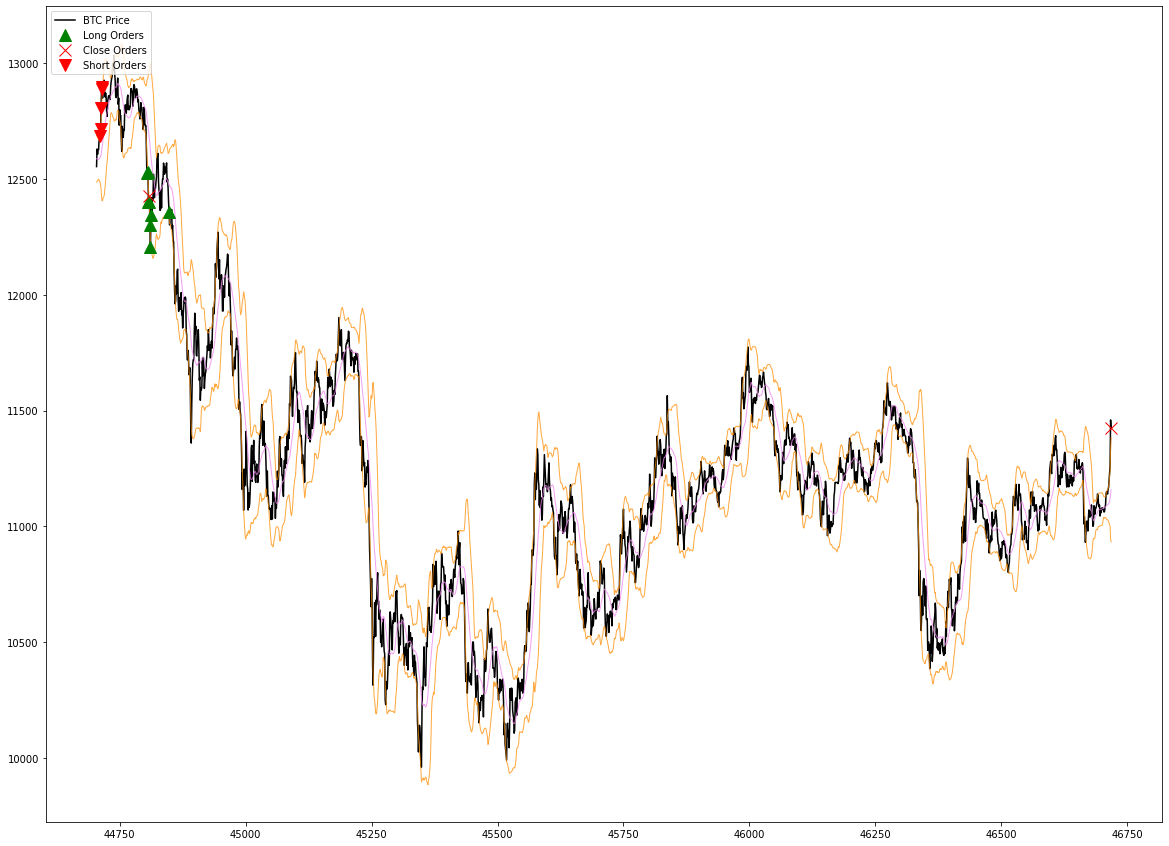

CPU times: total: 156 ms
Wall time: 168 ms


In [24]:
fig = plt.figure(figsize=(20,15))

# ax1 = fig.add_subplot(111, xlabel='Date', ylabel='Price $USD')
# ax2 = fig.add_subplot(111, xlabel='Date', ylabel='RSI')


subplot = False

wwindow = 2
specific_window = test_windows[wwindow]
window_name = 'window_' + str(wwindow)





period_mean_price = df_BTC.close.rolling(window = period).mean().fillna(method='bfill')
period_mean_price = period_mean_price.iloc[specific_window[0]:specific_window[1]]

period_std_price = df_BTC.close.rolling(window = period).std().fillna(method='bfill')
period_std_price = period_std_price.iloc[specific_window[0]:specific_window[1]]

lower_band = period_mean_price - (period_std_price * devs)
upper_band = period_mean_price + (period_std_price * devs)


###############################################

if (subplot):
    plt.subplot(211)

plt.plot(df_BTC.iloc[specific_window[0]:specific_window[1]].close, color='black', lw=1.5, label='BTC Price')
plt.plot(period_mean_price, color='violet', lw=1, alpha=0.75)
plt.plot(lower_band, color='darkorange', lw=1, alpha=0.75)
plt.plot(upper_band, color='darkorange', lw=1, alpha=0.75)

# plt.plot(df_BTC.EMA_55[specific_window[0]:specific_window[1]], color='green', lw=1, alpha=1.0, label='Fast MA')
# plt.plot(df_BTC.EMA_200[specific_window[0]:specific_window[1]], color='red', lw=1, alpha=1.0, label='Slow MA')





#### TRADES #####
trades = df_trade_loc[window_name].loc[np.where(~df_trade_loc[window_name].isnull())].reset_index(inplace=False, drop=False)
trade_locs = trades.index.values



##### LONG ORDERS #####
buy_orders = trades.loc[np.where([x==1.0 for x in trades[window_name]])]
buy_locs = buy_orders['index'].values

if(len(buy_locs > 0)):
#     buy_values = buy_orders.apply(lambda x: [x[1] for x in list(buy_orders[window_name])])[window_name]
    buy_values = df_BTC.loc[buy_orders['index'].values].close.values

    plt.plot(buy_locs, # X Dim
             buy_values, # Y Dim
            '^', markersize=12, color='g', label='Long Orders')

    
##### CLOSE ORDERS #####
close_orders = trades.loc[np.where([x==0.0 for x in trades[window_name]])]
close_locs = close_orders['index'].values

if(len(close_locs > 0)):
    
#     close_values = close_orders.apply(lambda x: [x[1] for x in list(close_orders[window_name])])[window_name]
    close_values = df_BTC.loc[close_orders['index'].values].close.values

    plt.plot(close_locs, # X Dim
         close_values, # Y Dim
        'x', markersize=12, color='r', label = 'Close Orders')
    
    
##### SHORT ORDERS #####
sell_orders = trades.loc[np.where([x==-1.0 for x in trades[window_name]])]
sell_locs = sell_orders['index'].values

if(len(sell_locs > 0)):
#     sell_values = sell_orders.apply(lambda x: [x[1] for x in list(sell_orders[window_name])])[window_name]
    sell_values = df_BTC.loc[sell_orders['index'].values].close.values


    plt.plot(sell_locs, # X Dim
             sell_values, # Y Dim
            'v', markersize=12, color='r', label = 'Short Orders')


plt.legend(loc='upper left')
plt.grid()

###############################################

if (subplot):
    plt.subplot(212)
    plt.plot(df_BTC.iloc[specific_window[0]:specific_window[1]].RSI, color='blue', lw=1, label='RSI')





plt.legend(loc='upper left')
plt.grid()

print(df_pnl[wwindow].tail(1))

%time plt.show()

In [25]:
df_pnl

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,1000.062974,1000.010000,1000.002857,1000.004000,1000.000952,1000.002857,999.995218,1000.005000,1000.002000,1000.034616,...,1000.005000,1000.002222,1000.020824,1000.001000,1000.010000,1000.001111,1000.001429,1000.000714,1000.033320,1000.002000
2,1000.208286,1000.020000,1000.005714,1000.008000,1000.001905,1000.005714,999.921998,1000.010000,1000.004000,1000.330390,...,1000.010000,1000.004444,999.787918,1000.002000,1000.020000,1000.002222,1000.002857,1000.001429,1000.055291,1000.004000
3,1000.200688,1000.026669,1000.008571,1000.012000,1000.002857,1000.008571,999.229997,1000.015000,1000.006000,1000.402507,...,1000.015000,1000.006667,1000.304842,1000.003000,1000.045374,1000.003333,1000.004286,1000.002143,1000.219054,1000.006000
4,1000.219137,1000.033338,1000.011429,1000.016000,1000.003810,1000.011429,999.838282,1000.020000,1000.008000,1000.474623,...,1000.020000,1000.008889,1000.346173,1000.004000,1000.125396,1000.004444,1000.005714,1000.002857,1000.764240,1000.008000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,1034.284126,1039.653805,998.758616,1002.828861,1077.690406,1000.212981,1032.366624,999.586637,1072.258365,1000.989182,...,1078.976817,1034.540651,1004.191756,1066.773491,991.546347,1002.520021,1106.334745,999.583903,1035.478142,1116.959283
2011,1034.284126,1039.653805,998.758616,1002.828861,1077.690406,1000.212981,1032.366624,999.586637,1072.258365,1000.989182,...,1078.976817,1034.540651,1004.191756,1066.773491,991.546347,1002.520021,1106.334745,999.583903,1035.478142,1116.959283
2012,1034.284126,1039.653805,998.758616,1002.828861,1077.690406,1000.212981,1032.366624,999.586637,1072.258365,1000.989182,...,1078.976817,1034.540651,1004.191756,1066.773491,991.546347,1002.520021,1106.334745,999.583903,1035.478142,1116.959283
2013,1034.284126,1039.653805,998.758616,1002.828861,1077.690406,1000.212981,1032.366624,999.586637,1072.258365,1000.989182,...,1078.976817,1034.540651,1004.191756,1066.773491,991.546347,1002.520021,1106.334745,999.583903,1035.478142,1116.959283


Number of trades executed: 1245
Final balance:  1028.1279474863436
Final BTC return: 1001.00665


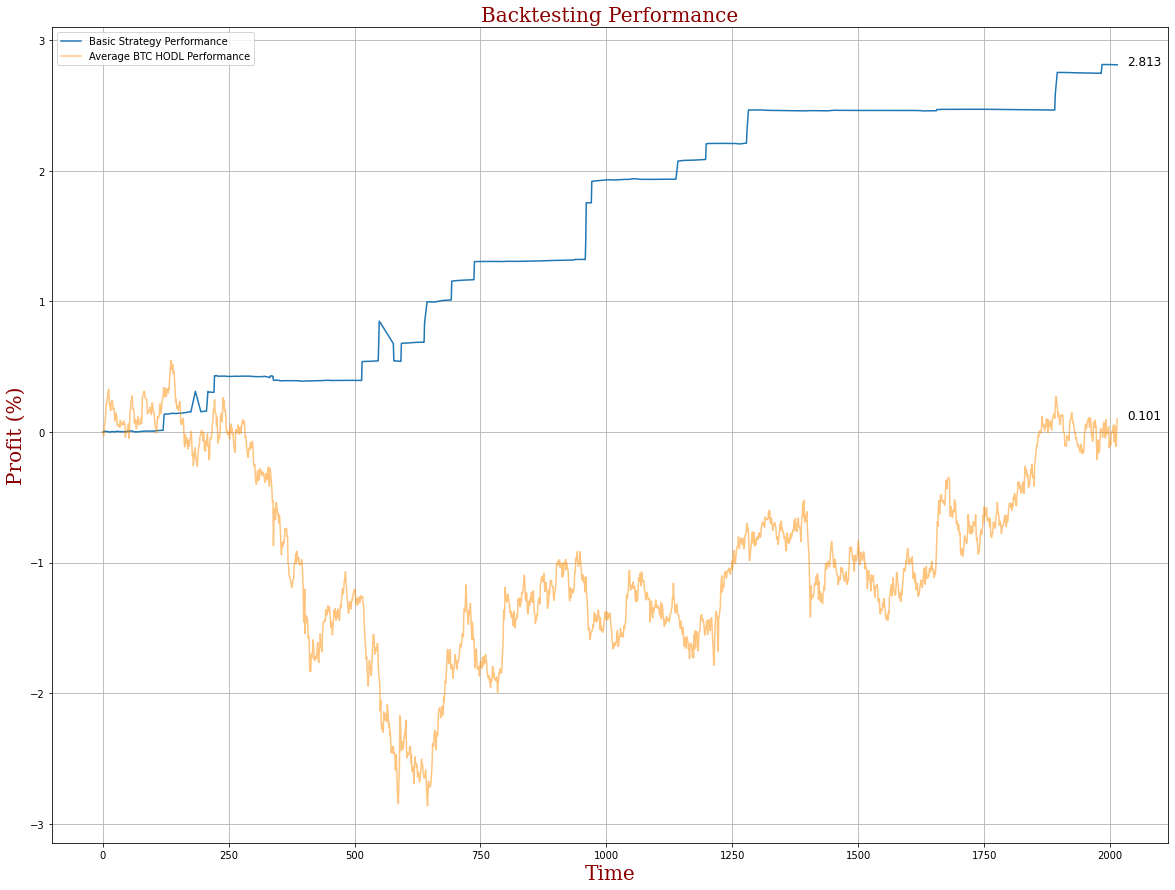

In [26]:
print('Number of trades executed: ' + str(len(pnl)))
print('Final balance: ', df_pnl_total.iloc[-1])
print('Final BTC return:', df_btc_perf.iloc[-1])



results = pd.DataFrame(columns = ['Basic Strategy', 'BTC avg Performance'])


results['Basic Strategy'] = df_pnl_total
results['BTC avg Performance'] = df_btc_perf


# Create a copy dataframe that is purely in percentages
avg_results = results.copy()
avg_results['Basic Strategy'] = (((results['Basic Strategy'] / 1000) - 1) * 100)
avg_results['BTC avg Performance'] = (((results['BTC avg Performance'] / 1000) - 1) * 100)


fig = plt.figure(figsize=(20,15))



font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

ax = fig.add_subplot(111)



data_to_plot = avg_results.copy()

plt.title('Backtesting Performance', fontdict=font)
plt.xlabel('Time', fontdict=font)
plt.ylabel('Profit (%)', fontdict=font)

plt.plot(avg_results['Basic Strategy'], label='Basic Strategy Performance')
plt.plot(avg_results['BTC avg Performance'], label='Average BTC HODL Performance', color='darkorange', alpha=0.5)





x1 = avg_results.iloc[-1].name
y1 = round(avg_results['Basic Strategy'].iloc[-1], 3)

x2 = avg_results.iloc[-1].name
y2 = round(avg_results['BTC avg Performance'].iloc[-1], 3)


ax.annotate(y1, xy=(x1 + (x1*0.01), y1), xycoords=('data'), size=12)
ax.annotate(y2, xy=(x2 + (x2*0.01), y2), xycoords=('data'), size=12)





plt.grid()

plt.legend(loc='upper left')




plt.show()

### Avg BTC Performance:

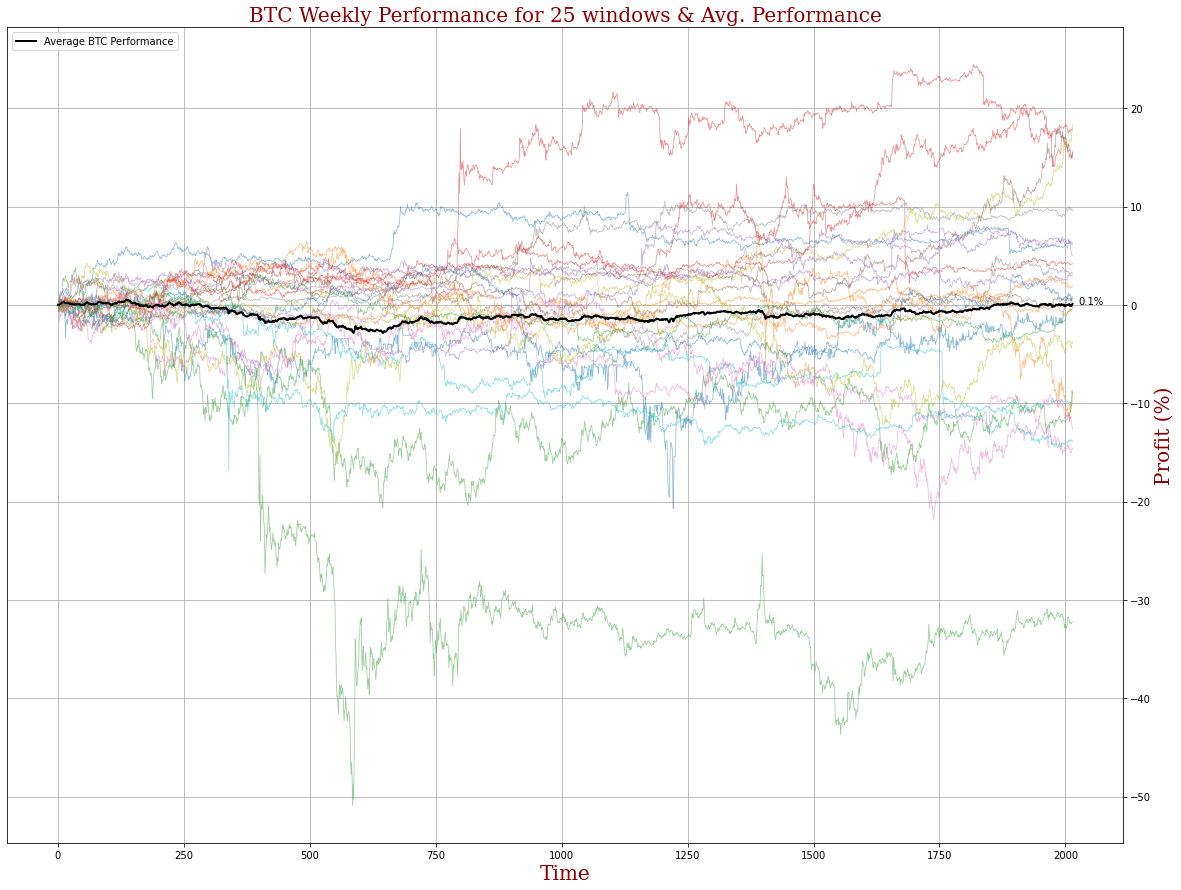

In [27]:
fig = plt.figure(figsize=(20,15))



font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

ax = fig.add_subplot(111)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()



plt.title('BTC ' + window_length + ' Performance for ' + str(windows) + ' windows & Avg. Performance', fontdict=font)
plt.xlabel('Time', fontdict=font)
plt.ylabel('Profit (%)', fontdict=font)





for i in btc_perf.columns:
    plt.plot( (btc_perf[i] - 1.0)*100, linewidth=0.75, alpha=0.5)
    
plt.plot( (df_btc_perf - 1000)/10, color='black', linewidth=2, label='Average BTC Performance')


btc_avg = (df_btc_perf - 1000)/10

x1 = len(btc_avg)
y1 = round(btc_avg.iloc[-1], 2)

ax.annotate(str(y1) + "%", xy=(x1 + (x1*0.005), y1), xycoords=('data'), size=10)




plt.grid()

plt.legend(loc='upper left')




plt.show()

### Avg Strategy Performance

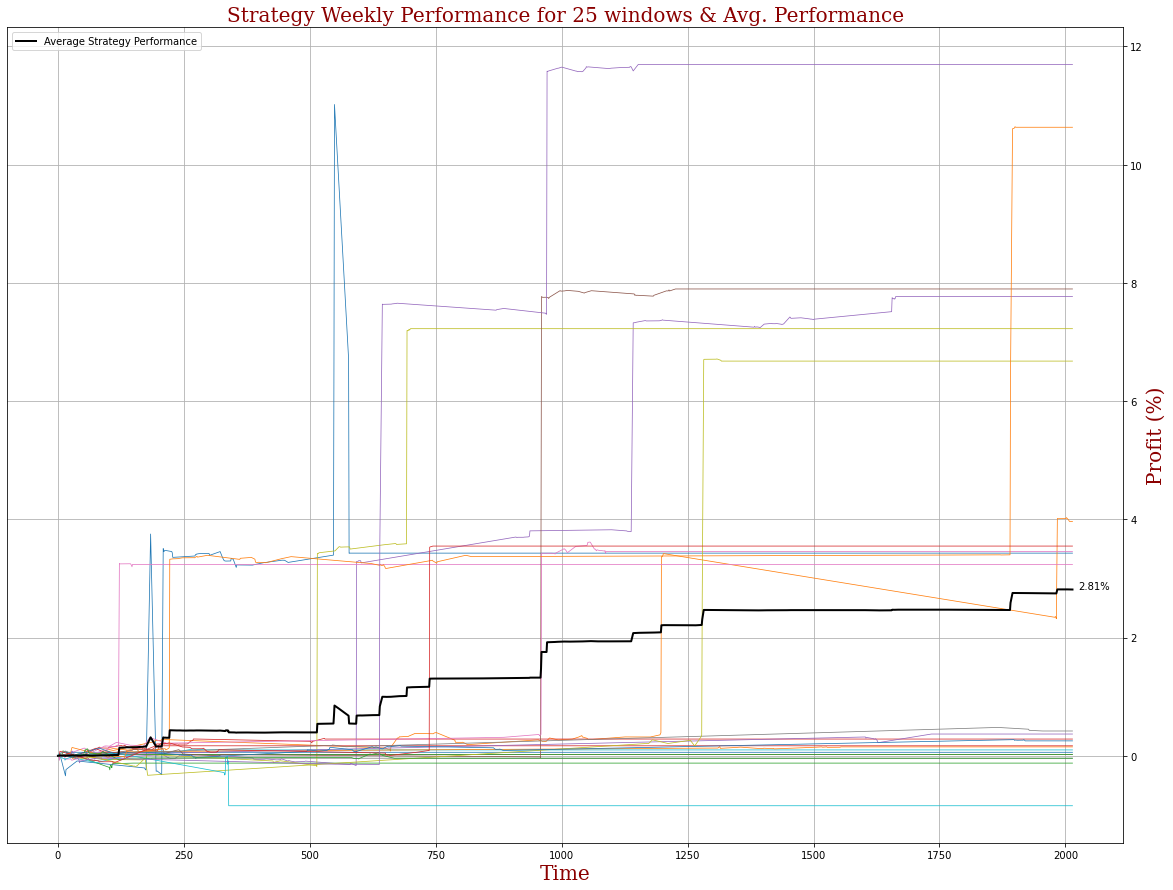

In [28]:
fig = plt.figure(figsize=(20,15))



font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

ax = fig.add_subplot(111)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()



plt.title('Strategy ' + window_length + ' Performance for ' + str(windows) + ' windows & Avg. Performance', fontdict=font)
plt.xlabel('Time', fontdict=font)
plt.ylabel('Profit (%)', fontdict=font)





for i in df_pnl.columns:
    plt.plot( (df_pnl[i] - 1000)/10, linewidth=0.75 )
    
plt.plot((df_pnl_total - 1000)/10, color='black', linewidth=2, label='Average Strategy Performance')


# Annotations for each strategy
# minindex = df_pnl[df_pnl.min().idxmin()].idxmin() # X axis
# minvalue = df_pnl[df_pnl.min().idxmin()].min() 
# minv = round((-(1 - (minvalue / 1000))* 100), 2) # Y axis

# maxindex = df_pnl[df_pnl.max().idxmax()].idxmax() # X axis
# maxvalue = df_pnl[df_pnl.max().idxmax()].max()
# maxv = round((((maxvalue / 1000) - 1)*100), 2) # Y axis


# Annotations for average strategy
# minindex_avg = df_pnl_total[df_pnl_total.min().idxmin()].idxmin() # X axis
# minvalue_avg = df_pnl_total[df_pnl_total.min().idxmin()].min() 
# minv_avg = round((-(1 - (minvalue_avg / 1000))* 100), 2) # Y axis

# maxindex_avg = df_pnl_total[df_pnl_total.max().idxmax()].idxmax() # X axis
# maxvalue_avg = df_pnl_total[df_pnl_total.max().idxmax()].max()
# maxv_avg = round((((maxvalue_avg / 1000) - 1)*100), 2) # Y axis



# ax.annotate(str(minv) + '%', xy=(minindex + (minindex*0.01), minv - 1), xycoords=('data'), size=12)
# ax.annotate(str(maxv) + '%', xy=(maxindex + (maxindex*0.01), maxv - 1), xycoords=('data'), size=12)

# ax.annotate(str(minv_avg) + '%', xy=(minindex_avg + (minindex_avg*0.01), minv_avg - 1), xycoords=('data'), size=12)
# ax.annotate(str(maxv_avg) + '%', xy=(maxindex_avg + (maxindex_avg*0.01), maxv_avg - 1), xycoords=('data'), size=12)



strat_avg = (df_pnl_total - 1000)/10

x1 = len(df_pnl_total)
y1 = round((df_pnl_total.iloc[-1] / principal - 1) * 100, 2)

ax.annotate(str(y1) + "%", xy=(x1 + (x1*0.005), y1), xycoords=('data'), size=10)





plt.grid()

plt.legend(loc='upper left')




plt.show()

In [29]:
(df_pnl_total.iloc[-1] / principal - 1) * 100

2.812794748634362

In [30]:
0.5073/0.4595

1.1040261153427637

### Median BTC Performance

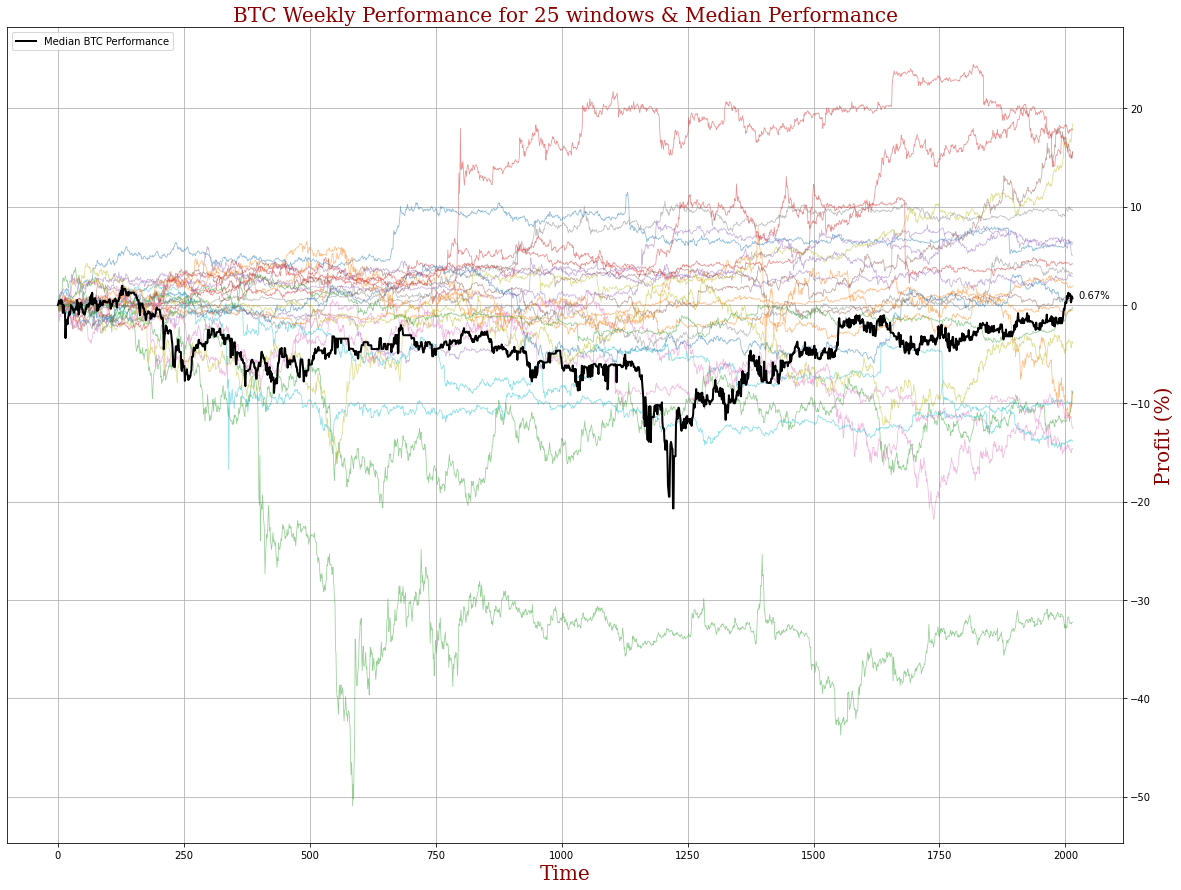

In [31]:
fig = plt.figure(figsize=(20,15))

df_BTC_perc_perf = (btc_perf - 1)*100
median_return = df_BTC_perc_perf.iloc[-1].median()
btc_median = df_BTC_perc_perf[np.where(df_BTC_perc_perf.iloc[-1] == median_return)[0][0]]




font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

ax = fig.add_subplot(111)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()



plt.title('BTC ' + window_length + ' Performance for ' + str(windows) + ' windows & Median Performance', fontdict=font)
plt.xlabel('Time', fontdict=font)
plt.ylabel('Profit (%)', fontdict=font)





plt.plot(df_BTC_perc_perf, linewidth=0.75, alpha=0.5)
    
plt.plot(btc_median, color='black', linewidth=2, label='Median BTC Performance')




x1 = df_btc_perf.iloc[-1]
y1 = round(df_btc_perf.iloc[-1], 2)


median_BTC_score = round(btc_median.iloc[-1], 2)


ax.annotate(y1, xy=(x1 + (x1*0.01), y1), xycoords=('data'), size=12)
ax.annotate(str(median_BTC_score) + "%", xy = (len(btc_median) + (len(btc_median)*0.005), median_BTC_score), xycoords=('data'), size=10)




plt.grid()

plt.legend(loc='upper left')




plt.show()

### Median Strategy Return

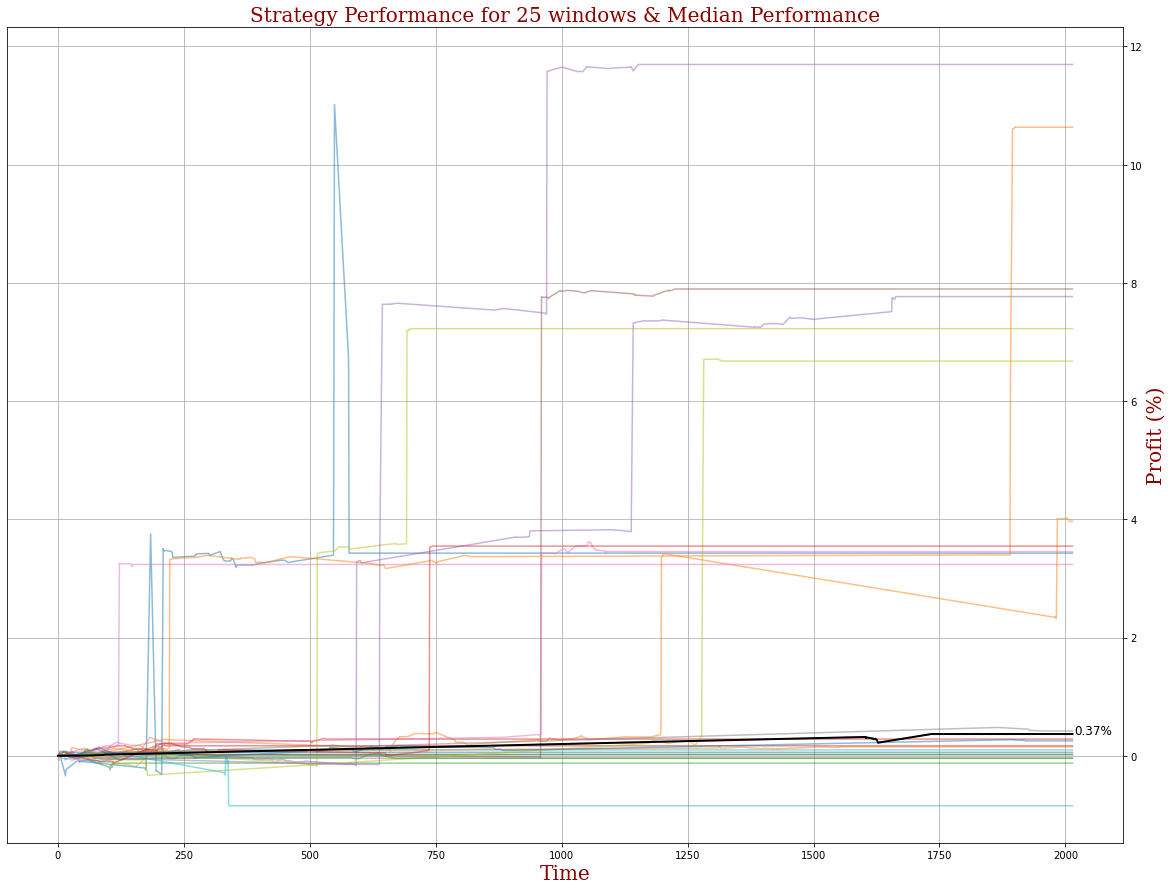

In [32]:
fig = plt.figure(figsize=(20,15))

df_perc_perf = ((df_pnl / 1000) - 1)*100
median_return = df_perc_perf.iloc[-1].median()
strategy_median = df_perc_perf[np.where(df_perc_perf.iloc[-1] == median_return)[0][0]]

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

ax = fig.add_subplot(111)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()



plt.title('Strategy Performance for ' + str(windows) + ' windows & Median Performance', fontdict=font)
# plt.title('1m Median Performance for ' + str(windows) + ' Lagging Indicator Crossover Strategies', fontdict=font)
# plt.title('1h Median Performance for ' + str(windows) + ' Lagging Indicator Crossover Strategies', fontdict=font)
# plt.title('1d Median Performance for ' + str(windows) + ' Lagging Indicator Crossover Strategies', fontdict=font)


plt.xlabel('Time', fontdict=font)
plt.ylabel('Profit (%)', fontdict=font)

median_value = df_perc_perf.iloc[-1].copy()
midpoint_index = np.where(median_value == median_value.median())[0][0]




# plt.plot(df_perc_perf, linewidth=0.75)
plt.plot(df_perc_perf, alpha=0.5)
# plt.plot(0, color='black')
plt.plot(strategy_median, color='black', linewidth=2, label='Median Strategy Performance')


# Annotations for each strategy
# minindex = df_pnl[df_pnl.min().idxmin()].idxmin() # X axis
# minvalue = df_pnl[df_pnl.min().idxmin()].min() 
# minv = round((-(1 - (minvalue / 1000))* 100), 2) # Y axis

# maxindex = df_pnl[df_pnl.max().idxmax()].idxmax() # X axis
# maxvalue = df_pnl[df_pnl.max().idxmax()].max()
# maxv = round((((maxvalue / 1000) - 1)*100), 2) # Y axis


# # Annotations for average strategy
# minindex_avg = df_pnl_total[df_pnl_total.min().idxmin()].idxmin() # X axis
# minvalue_avg = df_pnl_total[df_pnl_total.min().idxmin()].min() 
# minv_avg = round((-(1 - (minvalue_avg / 1000))* 100), 2) # Y axis

# maxindex_avg = df_pnl_total[df_pnl_total.max().idxmax()].idxmax() # X axis
# maxvalue_avg = df_pnl_total[df_pnl_total.max().idxmax()].max()
# # maxv_avg = round((((maxvalue_avg / 1000) - 1)*100), 2) # Y axis

median_score = round(df_perc_perf.iloc[-1].median(), 2)




# Median annotation
ax.annotate(str(median_score) + '%', xy=(len(df_perc_perf.index) + len(df_perc_perf.index)*0.001, median_score), xycoords=('data'), size=12)





plt.grid()

# plt.legend(loc='upper left')




plt.show()

---
# Buy/sell indicators
